# Data Processing

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import time
import matplotlib.pyplot as plt

In [2]:
yf = pd.read_csv('yf3data.csv')

In [3]:
# transform date column datetime
dates = yf['Date'].values
yf['Date'] = np.array(dates, dtype='datetime64[D]')
print("---Transformed Date Column")

yf.head()

---Transformed Date Column


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600,0.000000
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516526,601904800,0.001729
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000,-0.015906
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200,-0.001849
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800,0.006648


In [4]:
# Select relevant columns
yf = yf[['Ticker', 'Date', 'Daily Returns', 'Volume']]

In [5]:
# Retrieve S&P 500 Returns
sp500 = pd.read_csv('snp500historicaldata.csv')
sp500.head()

,Date,Price,Open,High,Low
0,2010-01-04,1132.99,1116.56,1133.87,1116.56
1,2010-01-05,1136.52,1132.66,1136.63,1129.66
2,2010-01-06,1137.14,1135.71,1139.19,1133.95
3,2010-01-07,1141.69,1136.27,1142.46,1131.32
4,2010-01-08,1144.98,1140.52,1145.39,1136.22


In [6]:
# Convert Date todatetime64[ns] datatype
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.dtypes

Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
dtype: object

In [7]:
# function to calculate daily returns for portfolio, ticker
def dailyReturns2(df, col_name):
    # calculate daily returns for each ticker using vectorized operations
    df[col_name] = (df['Price'] / df['Price'].shift(1) - 1).fillna(0)
    return df

# Add S&P Daily Returns Column
dailyReturns2(sp500, 'SP500 Returns')
sp500

,Date,Price,Open,High,Low,SP500 Returns
0,2010-01-04,1132.99,1116.56,1133.87,1116.56,0.000000
1,2010-01-05,1136.52,1132.66,1136.63,1129.66,0.003116
2,2010-01-06,1137.14,1135.71,1139.19,1133.95,0.000546
3,2010-01-07,1141.69,1136.27,1142.46,1131.32,0.004001
4,2010-01-08,1144.98,1140.52,1145.39,1136.22,0.002882
...,...,...,...,...,...,...
2763,2020-12-23,3690.01,3693.42,3711.24,3689.28,0.000746
2764,2020-12-24,3703.06,3694.03,3703.82,3689.32,0.003537
2765,2020-12-28,3735.36,3723.03,3740.51,3723.03,0.008723
2766,2020-12-29,3727.04,3750.01,3756.12,3723.31,-0.002227


In [8]:
# Select relevant columns
sp500 = sp500[['Date', 'SP500 Returns']]

In [9]:
# Set RFR
rfr = 0.02/252

# Calculate MRP
sp500['Market Risk Premium'] = sp500['SP500 Returns'] - rfr

In [10]:
# Set index for merging
sp500 = sp500.set_index('Date')
yf = yf.set_index('Date')

# Merge SP500 with trading universe
mdf1 = yf.merge(sp500, how='left', left_index = True, right_index = True)
mdf1

,Ticker,Daily Returns,Volume,SP500 Returns,Market Risk Premium
Date,,,,,
2010-01-04,AAPL,0.000000,493729600,0.000000,-0.000079
2010-01-04,MSFT,0.000000,38409100,0.000000,-0.000079
2010-01-04,GOOGL,0.000000,78169752,0.000000,-0.000079
2010-01-04,AMZN,0.000000,151998000,0.000000,-0.000079
2010-01-04,XOM,0.000000,27809100,0.000000,-0.000079
...,...,...,...,...,...
2020-12-30,PRAA,0.030580,116900,0.001342,0.001262
2020-12-30,IVR,0.000000,558080,0.001342,0.001262
2020-12-30,ABM,0.000530,207200,0.001342,0.001262


In [11]:
sp500 = sp500.reset_index()

In [12]:
# read corpfund
cf = pd.read_csv('corpfund.csv')

In [13]:
# transform date column datetime
dates = cf['calendardate'].values
cf['calendardate'] = np.array(dates, dtype='datetime64[D]')
print("---Transformed Date Column")

cf.head()

---Transformed Date Column


,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,A,ARQ,2010-03-31,2010-06-07,2010-04-30,2020-09-01,-239000000.0,7.767000e+09,NaN,5.712000e+09,...,348062907.0,348000000.0,354000000.0,3.652,6.997000e+09,0.0,31000000.0,0.0,20.106,3.003000e+09
1,A,ARQ,2010-06-30,2010-09-07,2010-07-31,2020-09-01,-225000000.0,9.100000e+09,NaN,5.735000e+09,...,346370351.0,347000000.0,352000000.0,3.988,7.188000e+09,0.0,22000000.0,0.0,20.715,2.818000e+09
2,A,ARQ,2010-09-30,2010-12-20,2010-10-31,2020-09-01,-88000000.0,9.696000e+09,NaN,6.169000e+09,...,347604202.0,344000000.0,356000000.0,4.581,7.746000e+09,0.0,-49000000.0,0.0,22.517,3.086000e+09
3,A,ARQ,2010-12-31,2011-03-09,2011-01-31,2020-09-01,-63000000.0,8.044000e+09,NaN,4.598000e+09,...,345122160.0,347000000.0,355000000.0,4.378,6.129000e+09,0.0,5000000.0,0.0,17.663,3.192000e+09
4,A,ARQ,2011-03-31,2011-06-07,2011-04-30,2020-09-01,278000000.0,8.649000e+09,NaN,5.096000e+09,...,348045143.0,347000000.0,355000000.0,4.833,6.601000e+09,0.0,60000000.0,0.0,19.023,3.504000e+09


In [14]:
# Keep rows with dimension ARQ
cf = cf[cf['dimension'] == 'ARQ']

# select chosen tickers
tickers = mdf1['Ticker'].unique()

# select rows containing chosen tickers in corpfund
cf = cf[cf['ticker'].isin(tickers)]
cf

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,A,ARQ,2010-03-31,2010-06-07,2010-04-30,2020-09-01,-239000000.0,7.767000e+09,NaN,5.712000e+09,...,348062907.0,348000000.0,354000000.0,3.652,6.997000e+09,0.0,31000000.0,0.0,20.106,3.003000e+09
1,A,ARQ,2010-06-30,2010-09-07,2010-07-31,2020-09-01,-225000000.0,9.100000e+09,NaN,5.735000e+09,...,346370351.0,347000000.0,352000000.0,3.988,7.188000e+09,0.0,22000000.0,0.0,20.715,2.818000e+09
2,A,ARQ,2010-09-30,2010-12-20,2010-10-31,2020-09-01,-88000000.0,9.696000e+09,NaN,6.169000e+09,...,347604202.0,344000000.0,356000000.0,4.581,7.746000e+09,0.0,-49000000.0,0.0,22.517,3.086000e+09
3,A,ARQ,2010-12-31,2011-03-09,2011-01-31,2020-09-01,-63000000.0,8.044000e+09,NaN,4.598000e+09,...,345122160.0,347000000.0,355000000.0,4.378,6.129000e+09,0.0,5000000.0,0.0,17.663,3.192000e+09
4,A,ARQ,2011-03-31,2011-06-07,2011-04-30,2020-09-01,278000000.0,8.649000e+09,NaN,5.096000e+09,...,348045143.0,347000000.0,355000000.0,4.833,6.601000e+09,0.0,60000000.0,0.0,19.023,3.504000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971760,CTAS,ARQ,2020-09-30,2020-10-09,2020-08-31,2020-10-09,-115950000.0,8.043381e+09,NaN,2.666177e+09,...,104625384.0,104625384.0,NaN,16.694,4.715692e+09,0.0,25215000.0,408400000.0,45.072,1.572827e+09
971768,HELE,ARQ,2020-09-30,2020-10-09,2020-08-31,2020-10-09,-14320000.0,2.174193e+09,NaN,9.519180e+08,...,25353261.0,25325000.0,25458000.0,20.962,1.141502e+09,21290000.0,9257000.0,5092000.0,45.074,4.515830e+08
971923,PAYX,ARQ,2020-09-30,2020-10-09,2020-08-31,2020-10-09,79500000.0,8.376900e+09,NaN,5.340200e+09,...,359500317.0,359100000.0,361300000.0,2.596,6.266000e+09,0.0,64500000.0,307300000.0,17.449,1.077100e+09
971927,JEF,ARQ,2020-09-30,2020-10-09,2020-08-31,2020-10-09,-196407000.0,5.177399e+10,NaN,NaN,...,255434677.0,255434677.0,NaN,6.327,4.985945e+10,0.0,107403000.0,0.0,195.195,NaN


In [15]:
# Select Relevant Columns
cf = cf[['ticker','calendardate','pe','ps','revenueusd','ebit','ebitda','intexp','ebitdamargin','netinccmnusd','rnd','equity','de']]
cf.head()

,ticker,calendardate,pe,ps,revenueusd,ebit,ebitda,intexp,ebitdamargin,netinccmnusd,rnd,equity,de
0,A,2010-03-31,54.283,2.225,1.271000e+09,161000000.0,197000000.0,22000000.0,0.155,108000000.0,150000000.0,2.624000e+09,1.957
1,A,2010-06-30,24.080,1.994,1.384000e+09,251000000.0,311000000.0,24000000.0,0.225,205000000.0,154000000.0,2.802000e+09,2.245
2,A,2010-09-30,20.648,2.594,1.576000e+09,270000000.0,337000000.0,27000000.0,0.214,292000000.0,159000000.0,3.228000e+09,2.001
3,A,2010-12-31,19.916,2.764,1.519000e+09,221000000.0,284000000.0,23000000.0,0.187,193000000.0,159000000.0,3.332000e+09,1.412
4,A,2011-03-31,18.654,2.697,1.677000e+09,280000000.0,344000000.0,20000000.0,0.205,200000000.0,165000000.0,3.953000e+09,1.186


In [16]:
# Change Names
cf = cf.rename(columns = {'ticker': 'Ticker', 'calendardate': 'Date', 'pe': 'PE Ratio', 'ps': 'PS Ratio', 'netinccmnusd' : 'Net Income', 'equity': 'Equity', 'revenueusd':'Revenue', 'ebitda': 'EBITDA', 'rnd': 'RND','intexp':'Interest Expense','ebitdamargin':'EBITDA Margin', 'de':'DE Ratio','ebit':'EBIT'})

In [17]:
# Check for correlation/ potential multicollinearity issues
corrtable = cf[['PE Ratio','PS Ratio','Net Income','RND','Equity','DE Ratio']].corr()
corrtable

,PE Ratio,PS Ratio,Net Income,RND,Equity,DE Ratio
PE Ratio,1.000000,0.000164,-0.001484,-0.000788,-0.001058,0.000071
PS Ratio,0.000164,1.000000,-0.005851,-0.008790,-0.011384,-0.002365
Net Income,-0.001484,-0.005851,1.000000,0.061431,0.199037,0.002934
RND,-0.000788,-0.008790,0.061431,1.000000,0.398061,-0.000257
Equity,-0.001058,-0.011384,0.199037,0.398061,1.000000,-0.000092
DE Ratio,0.000071,-0.002365,0.002934,-0.000257,-0.000092,1.000000


From here, we can observe only RND and Equity has a higher positive correlation.
It is also intuitive to not run correlation of income line items as these would likely exhibit high correlation values.

In [18]:
print(cf[cf['Ticker']=='A'].skew())

PE Ratio            2.134575
PS Ratio            0.463745
Revenue             0.123217
EBIT               -0.535375
EBITDA             -0.488248
Interest Expense    0.595008
EBITDA Margin      -0.760165
Net Income         -1.146969
RND                 0.148146
Equity             -0.888249
DE Ratio            2.607805
dtype: float64


Here we are using one firm's data points to determine skewness and assume it to be relatively consistent for other firms' values. We will natural log all values that have an |skew| >= 0.75. Since PE Ratio, EBITDA Margin, Net Income, Equity and DE Ratio exhibits relatively high levels of skewness, we will natural log these numbers. We will also log Revenue since we would require to compute revenue together with other factors mentioned above.

In [19]:
cf = cf.set_index(['Ticker', 'Date'])
cf

PE Ratio  PS Ratio       Revenue         EBIT       EBITDA  \
Ticker Date                                                                     
A      2010-03-31    54.283     2.225  1.271000e+09  161000000.0  197000000.0   
       2010-06-30    24.080     1.994  1.384000e+09  251000000.0  311000000.0   
       2010-09-30    20.648     2.594  1.576000e+09  270000000.0  337000000.0   
       2010-12-31    19.916     2.764  1.519000e+09  221000000.0  284000000.0   
       2011-03-31    18.654     2.697  1.677000e+09  280000000.0  344000000.0   
...                     ...       ...           ...          ...          ...   
CTAS   2020-09-30    38.219     5.037  1.746575e+09  349770000.0  445949000.0   
HELE   2020-09-30    23.134     2.639  5.308520e+08   99386000.0  108601000.0   
PAYX   2020-09-30    28.334     7.442  9.322000e+08  276100000.0  325700000.0   
JEF    2020-09-30     7.696     0.963  1.616170e+09  434728000.0  473378000.0   
SNX    2020-09-30    15.806     0.325  6.464782e+09  208569000.0  292844000.0   

                   Interest Expense  EBITDA Margin   Net Income          RND  \
Ticker Date                                                                    
A      2010-03-31        22000000.0          0.155  108000000.0  150000000.0   
       2010-06-30        24000000.0          0.225  205000000.0  154000000.0   
       2010-09-30        27000000.0          0.214  292000000.0  159000000.0   
       2010-12-31        23000000.0          0.187  193000000.0  159000000.0   
       2011-03-31        20000000.0          0.205  200000000.0  165000000.0   
...                             ...            ...          ...          ...   
CTAS   2020-09-30        24550000.0          0.255  300005000.0          0.0   
HELE   2020-09-30         2796000.0          0.205   87333000.0          0.0   
PAYX   2020-09-30               0.0          0.349  211600000.0          0.0   
JEF    2020-09-30        21512000.0          0.293  304409000.0          0.0   
SNX    2020-09-30        28749000.0          0.045  134464000.0          0.0   

                         Equity  DE Ratio  
Ticker Date                                
A      2010-03-31  2.624000e+09     1.957  
       2010-06-30  2.802000e+09     2.245  
       2010-09-30  3.228000e+09     2.001  
       2010-12-31  3.332000e+09     1.412  
       2011-03-31  3.953000e+09     1.186  
...                         ...       ...  
CTAS   2020-09-30  3.604804e+09     1.231  
HELE   2020-09-30  1.308529e+09     0.662  
PAYX   2020-09-30  2.778600e+09     2.015  
JEF    2020-09-30  9.410665e+09     4.482  
SNX    2020-09-30  4.093582e+09     2.240  

[37377 rows x 11 columns]

In [20]:
# replace missing/ non-numeric values with nan
lcf = cf[['PE Ratio','EBITDA Margin','Net Income','Equity','DE Ratio']].applymap(lambda x: np.nan if pd.isna(x) or not isinstance(x, (int,float)) else x)

# log values if it is not nan and not 0
lcf = lcf.applymap(lambda x: np.log(x) if x!= 0 else 0 if pd.notna(x) else np.nan)

# Rename
lcf = lcf.rename(columns = {'PE Ratio': 'Log PE Ratio','Net Income': 'Log Net Income', 'Equity' : 'Log Equity', 'EBITDA Margin': 'Log EBITDA Margin', 'DE Ratio':'Log DE Ratio'})
lcf

Log PE Ratio  Log EBITDA Margin  Log Net Income  \
Ticker Date                                                          
A      2010-03-31      3.994211          -1.864330       18.497642   
       2010-06-30      3.181382          -1.491655       19.138521   
       2010-09-30      3.027618          -1.541779       19.492264   
       2010-12-31      2.991523          -1.676647       19.078201   
       2011-03-31      2.926061          -1.584745       19.113828   
...                         ...                ...             ...   
CTAS   2020-09-30      3.643333          -1.366492       19.519310   
HELE   2020-09-30      3.141303          -1.584745       18.285239   
PAYX   2020-09-30      3.344062          -1.052683       19.170208   
JEF    2020-09-30      2.040701          -1.227583       19.533883   
SNX    2020-09-30      2.760390          -3.101093       18.716807   

                   Log Equity  Log DE Ratio  
Ticker Date                                  
A      2010-03-31   21.687966      0.671413  
       2010-06-30   21.753599      0.808706  
       2010-09-30   21.895129      0.693647  
       2010-12-31   21.926839      0.345007  
       2011-03-31   22.097741      0.170586  
...                       ...           ...  
CTAS   2020-09-30   22.005533      0.207827  
HELE   2020-09-30   20.992169     -0.412490  
PAYX   2020-09-30   21.745213      0.700619  
JEF    2020-09-30   22.965109      1.500069  
SNX    2020-09-30   22.132686      0.806476  

[37377 rows x 5 columns]

In [21]:
# merge the two cf df back tgt
cf = cf.merge(lcf, how='left', left_index=True, right_index=True)
cf

PE Ratio  PS Ratio       Revenue         EBIT       EBITDA  \
Ticker Date                                                                     
A      2010-03-31    54.283     2.225  1.271000e+09  161000000.0  197000000.0   
       2010-06-30    24.080     1.994  1.384000e+09  251000000.0  311000000.0   
       2010-09-30    20.648     2.594  1.576000e+09  270000000.0  337000000.0   
       2010-12-31    19.916     2.764  1.519000e+09  221000000.0  284000000.0   
       2011-03-31    18.654     2.697  1.677000e+09  280000000.0  344000000.0   
...                     ...       ...           ...          ...          ...   
ZION   2019-06-30     9.002     2.651  6.800000e+08  256000000.0  305000000.0   
       2019-09-30    10.478     3.092  7.030000e+08  288000000.0  338000000.0   
       2019-12-31     8.819     2.467  7.070000e+08  235000000.0  280000000.0   
       2020-03-31     8.398     1.948  4.240000e+08   16000000.0   61000000.0   
       2020-06-30    12.024     2.312  5.120000e+08   82000000.0  100000000.0   

                   Interest Expense  EBITDA Margin   Net Income          RND  \
Ticker Date                                                                    
A      2010-03-31        22000000.0          0.155  108000000.0  150000000.0   
       2010-06-30        24000000.0          0.225  205000000.0  154000000.0   
       2010-09-30        27000000.0          0.214  292000000.0  159000000.0   
       2010-12-31        23000000.0          0.187  193000000.0  159000000.0   
       2011-03-31        20000000.0          0.205  200000000.0  165000000.0   
...                             ...            ...          ...          ...   
ZION   2019-06-30               0.0          0.449  189000000.0          0.0   
       2019-09-30               0.0          0.481  214000000.0          0.0   
       2019-12-31               0.0          0.396  174000000.0          0.0   
       2020-03-31               0.0          0.144    6000000.0          0.0   
       2020-06-30               0.0          0.195   57000000.0          0.0   

                         Equity  DE Ratio  Log PE Ratio  Log EBITDA Margin  \
Ticker Date                                                                  
A      2010-03-31  2.624000e+09     1.957      3.994211          -1.864330   
       2010-06-30  2.802000e+09     2.245      3.181382          -1.491655   
       2010-09-30  3.228000e+09     2.001      3.027618          -1.541779   
       2010-12-31  3.332000e+09     1.412      2.991523          -1.676647   
       2011-03-31  3.953000e+09     1.186      2.926061          -1.584745   
...                         ...       ...           ...                ...   
ZION   2019-06-30  7.599000e+09     8.220      2.197447          -0.800732   
       2019-09-30  7.509000e+09     8.370      2.349278          -0.731888   
       2019-12-31  7.353000e+09     8.407      2.176908          -0.926341   
       2020-03-31  7.472000e+09     8.565      2.127994          -1.937942   
       2020-06-30  7.575000e+09     9.092      2.486905          -1.634756   

                   Log Net Income  Log Equity  Log DE Ratio  
Ticker Date                                                  
A      2010-03-31       18.497642   21.687966      0.671413  
       2010-06-30       19.138521   21.753599      0.808706  
       2010-09-30       19.492264   21.895129      0.693647  
       2010-12-31       19.078201   21.926839      0.345007  
       2011-03-31       19.113828   22.097741      0.170586  
...                           ...         ...           ...  
ZION   2019-06-30       19.057258   22.751282      2.106570  
       2019-09-30       19.181487   22.739368      2.124654  
       2019-12-31       18.974566   22.718374      2.129065  
       2020-03-31       15.607270   22.734429      2.147684  
       2020-06-30       17.858562   22.748119      2.207395  

[38475 rows x 16 columns]

In [22]:
# reset index
mdf1 = mdf1.reset_index()
cf = cf.reset_index()

In [23]:
# Calculate Revenue Growth
cf['Revenue Growth'] = cf.groupby('Ticker')['Revenue'].pct_change()
cf

,Ticker,Date,PE Ratio,PS Ratio,Revenue,EBIT,EBITDA,Interest Expense,EBITDA Margin,Net Income,RND,Equity,DE Ratio,Log PE Ratio,Log EBITDA Margin,Log Net Income,Log Equity,Log DE Ratio,Revenue Growth
0,A,2010-03-31,54.283,2.225,1.271000e+09,161000000.0,197000000.0,22000000.0,0.155,108000000.0,150000000.0,2.624000e+09,1.957,3.994211,-1.864330,18.497642,21.687966,0.671413,NaN
1,A,2010-06-30,24.080,1.994,1.384000e+09,251000000.0,311000000.0,24000000.0,0.225,205000000.0,154000000.0,2.802000e+09,2.245,3.181382,-1.491655,19.138521,21.753599,0.808706,0.088906
2,A,2010-09-30,20.648,2.594,1.576000e+09,270000000.0,337000000.0,27000000.0,0.214,292000000.0,159000000.0,3.228000e+09,2.001,3.027618,-1.541779,19.492264,21.895129,0.693647,0.138728
3,A,2010-12-31,19.916,2.764,1.519000e+09,221000000.0,284000000.0,23000000.0,0.187,193000000.0,159000000.0,3.332000e+09,1.412,2.991523,-1.676647,19.078201,21.926839,0.345007,-0.036168
4,A,2011-03-31,18.654,2.697,1.677000e+09,280000000.0,344000000.0,20000000.0,0.205,200000000.0,165000000.0,3.953000e+09,1.186,2.926061,-1.584745,19.113828,22.097741,0.170586,0.104016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38470,ZION,2019-06-30,9.002,2.651,6.800000e+08,256000000.0,305000000.0,0.0,0.449,189000000.0,0.0,7.599000e+09,8.220,2.197447,-0.800732,19.057258,22.751282,2.106570,-0.034091
38471,ZION,2019-09-30,10.478,3.092,7.030000e+08,288000000.0,338000000.0,0.0,0.481,214000000.0,0.0,7.509000e+09,8.370,2.349278,-0.731888,19.181487,22.739368,2.124654,0.033824
38472,ZION,2019-12-31,8.819,2.467,7.070000e+08,235000000.0,280000000.0,0.0,0.396,174000000.0,0.0,7.353000e+09,8.407,2.176908,-0.926341,18.974566,22.718374,2.129065,0.005690
38473,ZION,2020-03-31,8.398,1.948,4.240000e+08,16000000.0,61000000.0,0.0,0.144,6000000.0,0.0,7.472000e+09,8.565,2.127994,-1.937942,15.607270,22.734429,2.147684,-0.400283


In [24]:
# Fill Nan in Revenue Growth
cf['Revenue Growth'] = cf['Revenue Growth'].fillna(0.0)
cf

,Ticker,Date,PE Ratio,PS Ratio,Revenue,EBIT,EBITDA,Interest Expense,EBITDA Margin,Net Income,RND,Equity,DE Ratio,Log PE Ratio,Log EBITDA Margin,Log Net Income,Log Equity,Log DE Ratio,Revenue Growth
0,A,2010-03-31,54.283,2.225,1.271000e+09,161000000.0,197000000.0,22000000.0,0.155,108000000.0,150000000.0,2.624000e+09,1.957,3.994211,-1.864330,18.497642,21.687966,0.671413,0.000000
1,A,2010-06-30,24.080,1.994,1.384000e+09,251000000.0,311000000.0,24000000.0,0.225,205000000.0,154000000.0,2.802000e+09,2.245,3.181382,-1.491655,19.138521,21.753599,0.808706,0.088906
2,A,2010-09-30,20.648,2.594,1.576000e+09,270000000.0,337000000.0,27000000.0,0.214,292000000.0,159000000.0,3.228000e+09,2.001,3.027618,-1.541779,19.492264,21.895129,0.693647,0.138728
3,A,2010-12-31,19.916,2.764,1.519000e+09,221000000.0,284000000.0,23000000.0,0.187,193000000.0,159000000.0,3.332000e+09,1.412,2.991523,-1.676647,19.078201,21.926839,0.345007,-0.036168
4,A,2011-03-31,18.654,2.697,1.677000e+09,280000000.0,344000000.0,20000000.0,0.205,200000000.0,165000000.0,3.953000e+09,1.186,2.926061,-1.584745,19.113828,22.097741,0.170586,0.104016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38470,ZION,2019-06-30,9.002,2.651,6.800000e+08,256000000.0,305000000.0,0.0,0.449,189000000.0,0.0,7.599000e+09,8.220,2.197447,-0.800732,19.057258,22.751282,2.106570,-0.034091
38471,ZION,2019-09-30,10.478,3.092,7.030000e+08,288000000.0,338000000.0,0.0,0.481,214000000.0,0.0,7.509000e+09,8.370,2.349278,-0.731888,19.181487,22.739368,2.124654,0.033824
38472,ZION,2019-12-31,8.819,2.467,7.070000e+08,235000000.0,280000000.0,0.0,0.396,174000000.0,0.0,7.353000e+09,8.407,2.176908,-0.926341,18.974566,22.718374,2.129065,0.005690
38473,ZION,2020-03-31,8.398,1.948,4.240000e+08,16000000.0,61000000.0,0.0,0.144,6000000.0,0.0,7.472000e+09,8.565,2.127994,-1.937942,15.607270,22.734429,2.147684,-0.400283


In [25]:
# set index
mdf1 = mdf1.set_index(['Date', 'Ticker'])
cf = cf.set_index(['Date', 'Ticker'])

# combine merge1 df with corpfund df
maindf = mdf1.merge(cf, how='left', left_index=True, right_index=True)

# reset index
maindf = maindf.reset_index()
maindf

,Date,Ticker,Daily Returns,Volume,SP500 Returns,Market Risk Premium,PE Ratio,PS Ratio,Revenue,EBIT,...,Net Income,RND,Equity,DE Ratio,Log PE Ratio,Log EBITDA Margin,Log Net Income,Log Equity,Log DE Ratio,Revenue Growth
0,2010-01-04,A,0.000000,3815561,0.000000,-0.000079,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,AA,0.000000,10773783,0.000000,-0.000079,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,AAL,0.000000,9837300,0.000000,-0.000079,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,AAP,0.000000,1701700,0.000000,-0.000079,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-04,AAPL,0.000000,493729600,0.000000,-0.000079,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459060,2020-12-30,XRX,-0.000873,1092600,0.001342,0.001262,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2459061,2020-12-30,YUM,0.000548,1267900,0.001342,0.001262,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2459062,2020-12-30,ZBH,-0.001509,440428,0.001342,0.001262,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2459063,2020-12-30,ZBRA,0.015104,166100,0.001342,0.001262,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# sort by Ticker then Date
maindf = maindf.sort_values(['Ticker', 'Date'])

# forward fill for each ticker
maindf = maindf.groupby('Ticker').apply(lambda x: x.fillna(method='ffill', limit=None))

# drop nan rows
maindf = maindf.dropna()
maindf

,Date,Ticker,Daily Returns,Volume,SP500 Returns,Market Risk Premium,PE Ratio,PS Ratio,Revenue,EBIT,...,Net Income,RND,Equity,DE Ratio,Log PE Ratio,Log EBITDA Margin,Log Net Income,Log Equity,Log DE Ratio,Revenue Growth
53280,2010-03-31,A,-0.006644,5293387,-0.003273,-0.003352,54.283,2.225,1.271000e+09,161000000.0,...,108000000.0,150000000.0,2.624000e+09,1.957,3.994211,-1.864330,18.497642,21.687966,0.671413,0.000000
54205,2010-04-01,A,0.004652,3105098,0.007414,0.007335,54.283,2.225,1.271000e+09,161000000.0,...,108000000.0,150000000.0,2.624000e+09,1.957,3.994211,-1.864330,18.497642,21.687966,0.671413,0.000000
55093,2010-04-05,A,0.007815,3731961,0.007928,0.007849,54.283,2.225,1.271000e+09,161000000.0,...,108000000.0,150000000.0,2.624000e+09,1.957,3.994211,-1.864330,18.497642,21.687966,0.671413,0.000000
55981,2010-04-06,A,-0.007467,3499054,0.001684,0.001605,54.283,2.225,1.271000e+09,161000000.0,...,108000000.0,150000000.0,2.624000e+09,1.957,3.994211,-1.864330,18.497642,21.687966,0.671413,0.000000
56869,2010-04-07,A,-0.007812,3269503,-0.005877,-0.005956,54.283,2.225,1.271000e+09,161000000.0,...,108000000.0,150000000.0,2.624000e+09,1.957,3.994211,-1.864330,18.497642,21.687966,0.671413,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455512,2020-12-23,ZION,0.034967,706800,0.000746,0.000666,12.024,2.312,5.120000e+08,82000000.0,...,57000000.0,0.0,7.575000e+09,9.092,2.486905,-1.634756,17.858562,22.748119,2.207395,0.207547
2456400,2020-12-24,ZION,-0.003907,327700,0.003537,0.003457,12.024,2.312,5.120000e+08,82000000.0,...,57000000.0,0.0,7.575000e+09,9.092,2.486905,-1.634756,17.858562,22.748119,2.207395,0.207547
2457288,2020-12-28,ZION,0.000461,835600,0.008723,0.008643,12.024,2.312,5.120000e+08,82000000.0,...,57000000.0,0.0,7.575000e+09,9.092,2.486905,-1.634756,17.858562,22.748119,2.207395,0.207547
2458176,2020-12-29,ZION,-0.013607,1084100,-0.002227,-0.002307,12.024,2.312,5.120000e+08,82000000.0,...,57000000.0,0.0,7.575000e+09,9.092,2.486905,-1.634756,17.858562,22.748119,2.207395,0.207547


In [27]:
# Select relevant columns
maindf = maindf[['Date', 'Ticker', 'Daily Returns','Volume','SP500 Returns','Market Risk Premium','Log PE Ratio','PS Ratio','EBIT','EBITDA','Interest Expense','Log EBITDA Margin','Log Net Income','RND','Log Equity','Log DE Ratio','Revenue Growth']]
maindf

,Date,Ticker,Daily Returns,Volume,SP500 Returns,Market Risk Premium,Log PE Ratio,PS Ratio,EBIT,EBITDA,Interest Expense,Log EBITDA Margin,Log Net Income,RND,Log Equity,Log DE Ratio,Revenue Growth
53280,2010-03-31,A,-0.006644,5293387,-0.003273,-0.003352,3.994211,2.225,161000000.0,197000000.0,22000000.0,-1.864330,18.497642,150000000.0,21.687966,0.671413,0.000000
54205,2010-04-01,A,0.004652,3105098,0.007414,0.007335,3.994211,2.225,161000000.0,197000000.0,22000000.0,-1.864330,18.497642,150000000.0,21.687966,0.671413,0.000000
55093,2010-04-05,A,0.007815,3731961,0.007928,0.007849,3.994211,2.225,161000000.0,197000000.0,22000000.0,-1.864330,18.497642,150000000.0,21.687966,0.671413,0.000000
55981,2010-04-06,A,-0.007467,3499054,0.001684,0.001605,3.994211,2.225,161000000.0,197000000.0,22000000.0,-1.864330,18.497642,150000000.0,21.687966,0.671413,0.000000
56869,2010-04-07,A,-0.007812,3269503,-0.005877,-0.005956,3.994211,2.225,161000000.0,197000000.0,22000000.0,-1.864330,18.497642,150000000.0,21.687966,0.671413,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455512,2020-12-23,ZION,0.034967,706800,0.000746,0.000666,2.486905,2.312,82000000.0,100000000.0,0.0,-1.634756,17.858562,0.0,22.748119,2.207395,0.207547
2456400,2020-12-24,ZION,-0.003907,327700,0.003537,0.003457,2.486905,2.312,82000000.0,100000000.0,0.0,-1.634756,17.858562,0.0,22.748119,2.207395,0.207547
2457288,2020-12-28,ZION,0.000461,835600,0.008723,0.008643,2.486905,2.312,82000000.0,100000000.0,0.0,-1.634756,17.858562,0.0,22.748119,2.207395,0.207547
2458176,2020-12-29,ZION,-0.013607,1084100,-0.002227,-0.002307,2.486905,2.312,82000000.0,100000000.0,0.0,-1.634756,17.858562,0.0,22.748119,2.207395,0.207547


In [28]:
# ICR Ratio
maindf['ICR Ratio'] = maindf['EBIT'] / maindf['Interest Expense']
maindf['ICR Ratio'] = maindf['ICR Ratio'].replace([np.inf, -np.inf],0.0)

# ROE Ratio
maindf['ROE Ratio'] = maindf['Log Net Income']/ maindf['Log Equity']
maindf['ROE Ratio'] = maindf['ROE Ratio'].replace([np.inf, -np.inf],0.0)

# Select relevant columns again
maindf = maindf[['Date', 'Ticker', 'Daily Returns','Volume','SP500 Returns','Market Risk Premium','Log PE Ratio','PS Ratio','Log EBITDA Margin','RND','Log DE Ratio','Revenue Growth','ICR Ratio','ROE Ratio']]
maindf

,Date,Ticker,Daily Returns,Volume,SP500 Returns,Market Risk Premium,Log PE Ratio,PS Ratio,Log EBITDA Margin,RND,Log DE Ratio,Revenue Growth,ICR Ratio,ROE Ratio
53280,2010-03-31,A,-0.006644,5293387,-0.003273,-0.003352,3.994211,2.225,-1.864330,150000000.0,0.671413,0.000000,7.318182,0.852899
54205,2010-04-01,A,0.004652,3105098,0.007414,0.007335,3.994211,2.225,-1.864330,150000000.0,0.671413,0.000000,7.318182,0.852899
55093,2010-04-05,A,0.007815,3731961,0.007928,0.007849,3.994211,2.225,-1.864330,150000000.0,0.671413,0.000000,7.318182,0.852899
55981,2010-04-06,A,-0.007467,3499054,0.001684,0.001605,3.994211,2.225,-1.864330,150000000.0,0.671413,0.000000,7.318182,0.852899
56869,2010-04-07,A,-0.007812,3269503,-0.005877,-0.005956,3.994211,2.225,-1.864330,150000000.0,0.671413,0.000000,7.318182,0.852899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455512,2020-12-23,ZION,0.034967,706800,0.000746,0.000666,2.486905,2.312,-1.634756,0.0,2.207395,0.207547,0.000000,0.785057
2456400,2020-12-24,ZION,-0.003907,327700,0.003537,0.003457,2.486905,2.312,-1.634756,0.0,2.207395,0.207547,0.000000,0.785057
2457288,2020-12-28,ZION,0.000461,835600,0.008723,0.008643,2.486905,2.312,-1.634756,0.0,2.207395,0.207547,0.000000,0.785057
2458176,2020-12-29,ZION,-0.013607,1084100,-0.002227,-0.002307,2.486905,2.312,-1.634756,0.0,2.207395,0.207547,0.000000,0.785057


In [ ]:
# Remove inf and nan values
maindf = maindf.replace([np.inf, -np.inf], 0)
maindf = maindf.fillna(0)

In [29]:
# Check for correlation/ potential multicollinearity issues between new set of variables
corrtable = maindf[['Volume','Market Risk Premium','Log PE Ratio','PS Ratio','Log EBITDA Margin','RND','Log DE Ratio','Revenue Growth','ICR Ratio','ROE Ratio']].corr()
corrtable

,Volume,Market Risk Premium,Log PE Ratio,PS Ratio,Log EBITDA Margin,RND,Log DE Ratio,Revenue Growth,ICR Ratio,ROE Ratio
Volume,1.000000,-0.007773,-0.027890,-0.004507,0.031025,0.011569,0.011072,0.003405,-0.004613,0.067887
Market Risk Premium,-0.007773,1.000000,-0.000745,-0.000381,-0.000864,-0.000299,0.001615,-0.001526,-0.000497,0.000159
Log PE Ratio,-0.027890,-0.000745,1.000000,0.090940,-0.055126,-0.024960,-0.099046,0.011599,0.001082,-0.237222
PS Ratio,-0.004507,-0.000381,0.090940,1.000000,0.108320,-0.004763,-0.059171,-0.005015,-0.001351,-0.008486
Log EBITDA Margin,0.031025,-0.000864,-0.055126,0.108320,1.000000,-0.022682,-0.020852,-0.007665,-0.002113,0.137615
RND,0.011569,-0.000299,-0.024960,-0.004763,-0.022682,1.000000,-0.008141,-0.000159,-0.000015,-0.080090
Log DE Ratio,0.011072,0.001615,-0.099046,-0.059171,-0.020852,-0.008141,1.000000,-0.007246,-0.022953,0.333951
Revenue Growth,0.003405,-0.001526,0.011599,-0.005015,-0.007665,-0.000159,-0.007246,1.000000,0.001110,0.021684
ICR Ratio,-0.004613,-0.000497,0.001082,-0.001351,-0.002113,-0.000015,-0.022953,0.001110,1.000000,0.000077
ROE Ratio,0.067887,0.000159,-0.237222,-0.008486,0.137615,-0.080090,0.333951,0.021684,0.000077,1.000000


Interestingly, not one pair returned a correlation |p| value of >= 0.5. This might be due to the log transformation earlier.

In [30]:
# Retrieve tickers
tickers = maindf['Ticker'].unique()
tickers

array(['A', 'AA', 'AAL', 'AAP', 'AAPL', 'AB', 'ABB', 'ABC', 'ABM', 'ABT',
       'ACGL', 'ACIW', 'ACM', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK',
       'AEE', 'AEO', 'AEP', 'AES', 'AFG', 'AFL', 'AGCO', 'AGNC', 'AGO',
       'AIG', 'AIT', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALE', 'ALGN',
       'ALGT', 'ALK', 'ALL', 'ALV', 'AMAT', 'AME', 'AMED', 'AMG', 'AMGN',
       'AMP', 'AMT', 'AMZN', 'AN', 'ANF', 'ANSS', 'AON', 'AOS', 'APA',
       'APD', 'APH', 'ARCC', 'ARE', 'ARLP', 'ARW', 'ASB', 'ASGN', 'ASH',
       'ASML', 'ATGE', 'ATI', 'ATO', 'ATR', 'ATVI', 'AVA', 'AVB', 'AVGO',
       'AVNT', 'AVY', 'AWI', 'AWK', 'AXP', 'AXS', 'AYI', 'AZN', 'AZPN',
       'B', 'BA', 'BAC', 'BAX', 'BB', 'BBBY', 'BBY', 'BC', 'BCO', 'BCPC',
       'BDC', 'BDN', 'BDX', 'BECN', 'BEN', 'BG', 'BGCP', 'BHC', 'BIG',
       'BIIB', 'BIO', 'BK', 'BKD', 'BKH', 'BKNG', 'BLK', 'BLKB', 'BMY',
       'BOH', 'BOKF', 'BPOP', 'BR', 'BRC', 'BRKR', 'BRO', 'BSX', 'BWA',
       'BX', 'BXMT', 'BXP', 'BYD', 'C', 'CACC', 'CACI',

# Relevant Functions

In [31]:
# import relevant library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

# function to retrieve p value
def find_p_value(X, y):
    f_stat, p_val = f_regression(X, y)
    return p_val

# linear regression function
def linearReg(ticker, dataset, int_col):
    # Split Data
    df = dataset[dataset['Ticker'] == ticker]
    train_set, test_set= np.split(df, [int(.8 *df.shape[0])])
    
    # Select Independent and Dependent Variables
    X_train = train_set[train_set['Ticker'] == ticker][int_col]
    y_train = train_set[train_set['Ticker'] == ticker]['Daily Returns']
    
    # Create Linear Regression Model
    CAPM_model = LinearRegression()

    # Train Model
    CAPM_model.fit(X_train, y_train)
    
    return CAPM_model.coef_, CAPM_model.intercept_, find_p_value(X_train, y_train)

In [32]:
# Long short position based on Jensen's alpha
def positions(pf):
    positions = []
    avalues = pf['Alpha'].values
    for alpha in avalues:
        if alpha >= rfr:
            positions.append('Buy')
        else:
            positions.append('Sell')
    pf['Position'] = positions
    
    num_buy = pf[pf['Position'] == 'Buy'].shape[0]
    num_sell = pf[pf['Position'] == 'Sell'].shape[0]
    print('Number of Buy :', num_buy)
    print('Number of Sell :', num_sell)
    
    return pf

In [33]:
# Calculate portfolio returns
def portfolioreturns(pf):
    # retrieve unique dates
    dates = pf['Date'].unique()
    # calcualte portfolio returns
    pf_returns_dict = {'Date': dates, 'Portfolio Returns': []}
    for date in dates:
        t_df = pf[pf['Date'] == date][['Position', 'Expected Return']]
        returns = t_df[t_df['Position'] == 'Buy']['Expected Return'].mean() - t_df[t_df['Position'] == 'Sell']['Expected Return'].mean()
        pf_returns_dict['Portfolio Returns'].append(returns)
    df_portfolioReturns = pd.DataFrame(pf_returns_dict)
    df_portfolioReturns = df_portfolioReturns.sort_values('Date')
    return df_portfolioReturns

In [182]:
# To create resultant dataframe of PF values against SP500
def portfoliocalculator(pf, spdata):
    # First to prepare sp500 for merge
    train_set, test_set= np.split(pf, [int(.8 *pf.shape[0])])
    start_date = test_set['Date'].min()
    end_date = test_set['Date'].max()
    sp = spdata[(spdata['Date']>=start_date) & (spdata['Date']<= end_date)]
    sp = sp[['Date','SP500 Returns']]
    pf = pf[(pf['Date']>=start_date) & (pf['Date']<= end_date)]
    
    # Merge pf with sp500
    pf = pf.set_index('Date')
    sp = sp.set_index('Date')
    backtest = pf.merge(sp, how ='left', left_index=True,right_index=True)
    
    # Change first values to 0.0
    backtest['Portfolio Returns'][0] = 0.0
    backtest['SP500 Returns'][0] = 0.0
    
    # Reset index
    backtest = backtest.reset_index()
    
    dates = backtest['Date'].unique()
    pf_values = [1000000.0]
    pf_pnls = [0.0]
    sp500_values = [1000000.0]
    sp500_pnls = [0.0]
    
    for i in range(1, len(dates)):
        pf_value = (1 + backtest['Portfolio Returns'][i]) * pf_values[i-1]
        pf_pnl = backtest['Portfolio Returns'][i] * pf_values[i-1]
        sp500_value = (1 + backtest['SP500 Returns'][i]) * sp500_values[i-1]
        sp500_pnl = backtest['SP500 Returns'][i] * sp500_values[i-1]
        pf_values.append(pf_value)
        pf_pnls.append(pf_pnl)
        sp500_values.append(sp500_value)
        sp500_pnls.append(sp500_pnl)
    
    backtest['Portfolio Value'] = pf_values
    backtest['Portfolio PnL'] = pf_pnls
    backtest['SP500 Value'] = sp500_values
    backtest['SP500 PnL'] = sp500_pnls

    return backtest

In [65]:
# Plot Portfolio Returns against SP500
def graph(data):
    # Dataset
    x = data['Date'].unique()
    y1 = data['Portfolio Value'].values
    y2 = data['SP500 Value'].values
    
    # Plot lines
    plt.plot(x, y1, label = 'Portfolio Value')
    plt.plot(x, y2, label = 'SP500 Value')
    plt.tight_layout()
    plt.legend()
    
    return plt.show()

In [78]:
# BackTest functions
def sharperatio(data):
    excess_return = data.mean() - rfr
    stddev = np.std(data)
    daily_sharpe = excess_return/stddev
    annualised_sharpe = daily_sharpe * np.sqrt(252)
    return daily_sharpe, annualised_sharpe

def drawdown_value(data):
    '''Calculates the drawdown duration and nominal value'''
    hwm = [0]
    idx = data.index
    drawdown = pd.Series(index = idx, dtype=float)
    duration = pd.Series(index = idx, dtype=float)
    for t in range(1, len(data)):
        cur_hwm = max(hwm[t-1], data[t])
        hwm.append(cur_hwm)
        drawdown[t]= hwm[t] - data[t]
        duration[t]= 0 if drawdown[t] == 0 else duration[t-1] + 1
    return drawdown.max(), duration.max()

def drawdowns(data, data2):
    '''Calculates the percentage of drawdown and plot'''
    roll_max = data.rolling(window=data2.shape[0], min_periods=1).max()
    daily_drawdown = (data / roll_max) - 1.0
    max_daily_drawdown = daily_drawdown.rolling(window=1, min_periods=1).min()
    return max_daily_drawdown

def calmarratio(data, data2):
    annualised_avg_return = data.mean() * 252
    max_dd = drawdowns(data2['Portfolio Value'],data2).min()
    calmar = annualised_avg_return/ abs(max_dd)
    return calmar

# Exploratory 1: Trading Volume

We assume that due to behavioral finance, individual investors would trade more significantly with respect to what they see on the news. And since majority of individual investors trade on 'buy' signals, we assume that high trading volume usually entail an increase in share price.

In [36]:
# Check for volume skewness
print(maindf[maindf['Ticker']=='A']['Volume'].skew())

2.645659614274208


In [37]:
# Natural log the volume column
maindf['Log Volume'] = np.log(maindf['Volume'])
maindf

,Date,Ticker,Daily Returns,Volume,SP500 Returns,Market Risk Premium,Log PE Ratio,PS Ratio,Log EBITDA Margin,RND,Log DE Ratio,Revenue Growth,ICR Ratio,ROE Ratio,Log Volume
53280,2010-03-31,A,-0.006644,5293387,-0.003273,-0.003352,3.994211,2.225,-1.864330,150000000.0,0.671413,0.000000,7.318182,0.852899,15.481969
54205,2010-04-01,A,0.004652,3105098,0.007414,0.007335,3.994211,2.225,-1.864330,150000000.0,0.671413,0.000000,7.318182,0.852899,14.948556
55093,2010-04-05,A,0.007815,3731961,0.007928,0.007849,3.994211,2.225,-1.864330,150000000.0,0.671413,0.000000,7.318182,0.852899,15.132444
55981,2010-04-06,A,-0.007467,3499054,0.001684,0.001605,3.994211,2.225,-1.864330,150000000.0,0.671413,0.000000,7.318182,0.852899,15.068003
56869,2010-04-07,A,-0.007812,3269503,-0.005877,-0.005956,3.994211,2.225,-1.864330,150000000.0,0.671413,0.000000,7.318182,0.852899,15.000149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455512,2020-12-23,ZION,0.034967,706800,0.000746,0.000666,2.486905,2.312,-1.634756,0.0,2.207395,0.207547,0.000000,0.785057,13.468503
2456400,2020-12-24,ZION,-0.003907,327700,0.003537,0.003457,2.486905,2.312,-1.634756,0.0,2.207395,0.207547,0.000000,0.785057,12.699854
2457288,2020-12-28,ZION,0.000461,835600,0.008723,0.008643,2.486905,2.312,-1.634756,0.0,2.207395,0.207547,0.000000,0.785057,13.635905
2458176,2020-12-29,ZION,-0.013607,1084100,-0.002227,-0.002307,2.486905,2.312,-1.634756,0.0,2.207395,0.207547,0.000000,0.785057,13.896261


In [123]:
beta_dict = {'Ticker': tickers, 
             'MRP Beta': [], 'MRP P Value': [],
             'Log Volume Beta': [], 'Log Volume P Value': [],
             'Alpha': []}
count = 0

int_col = ['Market Risk Premium', 'Log Volume']

for ticker in tickers:
    beta_value, alpha, p_value = linearReg(ticker, maindf, int_col)
    beta_dict['MRP Beta'].append(beta_value[0])
    beta_dict['MRP P Value'].append(p_value[0])
    beta_dict['Log Volume Beta'].append(beta_value[1])
    beta_dict['Log Volume P Value'].append(p_value[1])
    beta_dict['Alpha'].append(alpha)
    count += 1
    print(f'---Completed {ticker} => count: {count}')
    
df_pf1 = pd.DataFrame(beta_dict)

---Completed A => count: 1
---Completed AA => count: 2
---Completed AAL => count: 3
---Completed AAP => count: 4
---Completed AAPL => count: 5
---Completed AB => count: 6
---Completed ABB => count: 7
---Completed ABC => count: 8
---Completed ABM => count: 9
---Completed ABT => count: 10
---Completed ACGL => count: 11
---Completed ACIW => count: 12
---Completed ACM => count: 13
---Completed ACN => count: 14
---Completed ADBE => count: 15
---Completed ADI => count: 16
---Completed ADM => count: 17
---Completed ADP => count: 18
---Completed ADSK => count: 19
---Completed AEE => count: 20
---Completed AEO => count: 21
---Completed AEP => count: 22
---Completed AES => count: 23
---Completed AFG => count: 24
---Completed AFL => count: 25
---Completed AGCO => count: 26
---Completed AGNC => count: 27
---Completed AGO => count: 28
---Completed AIG => count: 29
---Completed AIT => count: 30
---Completed AIV => count: 31
---Completed AIZ => count: 32
---Completed AJG => count: 33
---Completed AKA

---Completed EQC => count: 268
---Completed EQIX => count: 269
---Completed EQR => count: 270
---Completed EQT => count: 271
---Completed ES => count: 272
---Completed ESGR => count: 273
---Completed ESS => count: 274
---Completed ET => count: 275
---Completed ETN => count: 276
---Completed ETR => count: 277
---Completed EVR => count: 278
---Completed EVRG => count: 279
---Completed EW => count: 280
---Completed EWBC => count: 281
---Completed EXC => count: 282
---Completed EXEL => count: 283
---Completed EXP => count: 284
---Completed EXPD => count: 285
---Completed EXPE => count: 286
---Completed EXR => count: 287
---Completed F => count: 288
---Completed FAST => count: 289
---Completed FCN => count: 290
---Completed FCX => count: 291
---Completed FDP => count: 292
---Completed FDS => count: 293
---Completed FDX => count: 294
---Completed FE => count: 295
---Completed FFIN => count: 296
---Completed FFIV => count: 297
---Completed FHI => count: 298
---Completed FHN => count: 299
---C

---Completed MTN => count: 532
---Completed MTX => count: 533
---Completed MTZ => count: 534
---Completed MU => count: 535
---Completed MUR => count: 536
---Completed MYGN => count: 537
---Completed NATI => count: 538
---Completed NBIX => count: 539
---Completed NBR => count: 540
---Completed NCR => count: 541
---Completed NDAQ => count: 542
---Completed NDSN => count: 543
---Completed NEE => count: 544
---Completed NEM => count: 545
---Completed NEOG => count: 546
---Completed NEU => count: 547
---Completed NFG => count: 548
---Completed NFLX => count: 549
---Completed NHI => count: 550
---Completed NI => count: 551
---Completed NJR => count: 552
---Completed NKE => count: 553
---Completed NLY => count: 554
---Completed NNN => count: 555
---Completed NOC => count: 556
---Completed NOV => count: 557
---Completed NRG => count: 558
---Completed NS => count: 559
---Completed NSC => count: 560
---Completed NTAP => count: 561
---Completed NTES => count: 562
---Completed NTRS => count: 563
-

---Completed TXT => count: 796
---Completed TYL => count: 797
---Completed UAA => count: 798
---Completed UAL => count: 799
---Completed UBSI => count: 800
---Completed UDR => count: 801
---Completed UGI => count: 802
---Completed UHAL => count: 803
---Completed UHS => count: 804
---Completed ULTA => count: 805
---Completed UMBF => count: 806
---Completed UNF => count: 807
---Completed UNFI => count: 808
---Completed UNH => count: 809
---Completed UNM => count: 810
---Completed UNP => count: 811
---Completed UPS => count: 812
---Completed URBN => count: 813
---Completed URI => count: 814
---Completed USB => count: 815
---Completed USM => count: 816
---Completed UTHR => count: 817
---Completed V => count: 818
---Completed VFC => count: 819
---Completed VHI => count: 820
---Completed VIAV => count: 821
---Completed VLO => count: 822
---Completed VLY => count: 823
---Completed VMC => count: 824
---Completed VMI => count: 825
---Completed VMW => count: 826
---Completed VNO => count: 827
--

In [124]:
df_pf1

,Ticker,MRP Beta,MRP P Value,Log Volume Beta,Log Volume P Value,Alpha
0,A,1.440083,0.000000e+00,0.000303,0.134605,-0.004410
1,AA,1.358396,1.677186e-66,-0.004322,0.057487,0.063595
2,AAL,1.374856,2.915559e-86,-0.002394,0.002098,0.037171
3,AAP,0.782927,7.394663e-80,0.001115,0.543883,-0.014796
4,AAPL,0.958020,1.250261e-179,-0.000004,0.098779,0.000703
...,...,...,...,...,...,...
874,XRX,1.266349,3.906351e-236,-0.000313,0.034602,0.004410
875,YUM,0.908137,1.578987e-197,-0.000827,0.008744,0.012845
876,ZBH,0.916108,1.181511e-224,-0.000290,0.013340,0.004172
877,ZBRA,1.174904,6.850773e-158,0.001086,0.412427,-0.013023


In [125]:
# select stocks to buy/sell
positions(df_pf1)

Number of Buy : 329
Number of Sell : 550


,Ticker,MRP Beta,MRP P Value,Log Volume Beta,Log Volume P Value,Alpha,Position
0,A,1.440083,0.000000e+00,0.000303,0.134605,-0.004410,Sell
1,AA,1.358396,1.677186e-66,-0.004322,0.057487,0.063595,Buy
2,AAL,1.374856,2.915559e-86,-0.002394,0.002098,0.037171,Buy
3,AAP,0.782927,7.394663e-80,0.001115,0.543883,-0.014796,Sell
4,AAPL,0.958020,1.250261e-179,-0.000004,0.098779,0.000703,Buy
...,...,...,...,...,...,...,...
874,XRX,1.266349,3.906351e-236,-0.000313,0.034602,0.004410,Buy
875,YUM,0.908137,1.578987e-197,-0.000827,0.008744,0.012845,Buy
876,ZBH,0.916108,1.181511e-224,-0.000290,0.013340,0.004172,Buy
877,ZBRA,1.174904,6.850773e-158,0.001086,0.412427,-0.013023,Sell


In [126]:
# Select relevant columns
tempdf = maindf[['Date', 'Ticker','Market Risk Premium','Log Volume','SP500 Returns']]

# Set index
tempdf = tempdf.set_index('Ticker')
df_pf1 = df_pf1.set_index('Ticker')

# Merge
df_pf1 = tempdf.merge(df_pf1, how='left', left_index=True, right_index=True)
df_pf1 = df_pf1.reset_index()
df_pf1

,Ticker,Date,Market Risk Premium,Log Volume,SP500 Returns,MRP Beta,MRP P Value,Log Volume Beta,Log Volume P Value,Alpha,Position
0,A,2010-03-31,-0.003352,15.481969,-0.003273,1.440083,0.000000e+00,0.000303,0.134605,-0.004410,Sell
1,A,2010-04-01,0.007335,14.948556,0.007414,1.440083,0.000000e+00,0.000303,0.134605,-0.004410,Sell
2,A,2010-04-05,0.007849,15.132444,0.007928,1.440083,0.000000e+00,0.000303,0.134605,-0.004410,Sell
3,A,2010-04-06,0.001605,15.068003,0.001684,1.440083,0.000000e+00,0.000303,0.134605,-0.004410,Sell
4,A,2010-04-07,-0.005956,15.000149,-0.005877,1.440083,0.000000e+00,0.000303,0.134605,-0.004410,Sell
...,...,...,...,...,...,...,...,...,...,...,...
2291745,ZION,2020-12-23,0.000666,13.468503,0.000746,1.233675,1.381472e-169,0.001016,0.469374,-0.014771,Sell
2291746,ZION,2020-12-24,0.003457,12.699854,0.003537,1.233675,1.381472e-169,0.001016,0.469374,-0.014771,Sell
2291747,ZION,2020-12-28,0.008643,13.635905,0.008723,1.233675,1.381472e-169,0.001016,0.469374,-0.014771,Sell
2291748,ZION,2020-12-29,-0.002307,13.896261,-0.002227,1.233675,1.381472e-169,0.001016,0.469374,-0.014771,Sell


In [127]:
# Calculate expected return
df_pf1['Expected Return'] = df_pf1['Alpha'] + df_pf1['MRP Beta']*df_pf1['Market Risk Premium'] + df_pf1['Log Volume']*df_pf1['Log Volume Beta']
df_pf1

,Ticker,Date,Market Risk Premium,Log Volume,SP500 Returns,MRP Beta,MRP P Value,Log Volume Beta,Log Volume P Value,Alpha,Position,Expected Return
0,A,2010-03-31,-0.003352,15.481969,-0.003273,1.440083,0.000000e+00,0.000303,0.134605,-0.004410,Sell,-0.004549
1,A,2010-04-01,0.007335,14.948556,0.007414,1.440083,0.000000e+00,0.000303,0.134605,-0.004410,Sell,0.010679
2,A,2010-04-05,0.007849,15.132444,0.007928,1.440083,0.000000e+00,0.000303,0.134605,-0.004410,Sell,0.011475
3,A,2010-04-06,0.001605,15.068003,0.001684,1.440083,0.000000e+00,0.000303,0.134605,-0.004410,Sell,0.002464
4,A,2010-04-07,-0.005956,15.000149,-0.005877,1.440083,0.000000e+00,0.000303,0.134605,-0.004410,Sell,-0.008445
...,...,...,...,...,...,...,...,...,...,...,...,...
2291745,ZION,2020-12-23,0.000666,13.468503,0.000746,1.233675,1.381472e-169,0.001016,0.469374,-0.014771,Sell,-0.000270
2291746,ZION,2020-12-24,0.003457,12.699854,0.003537,1.233675,1.381472e-169,0.001016,0.469374,-0.014771,Sell,0.002392
2291747,ZION,2020-12-28,0.008643,13.635905,0.008723,1.233675,1.381472e-169,0.001016,0.469374,-0.014771,Sell,0.009740
2291748,ZION,2020-12-29,-0.002307,13.896261,-0.002227,1.233675,1.381472e-169,0.001016,0.469374,-0.014771,Sell,-0.003504


In [128]:
# Run portfolio returns function
dfp1 = portfolioreturns(df_pf1)
dfp1

,Date,Portfolio Returns
0,2010-03-31,0.000415
1,2010-04-01,-0.001294
2,2010-04-05,-0.001242
3,2010-04-06,-0.000325
4,2010-04-07,0.000657
...,...,...
2703,2020-12-23,0.000161
2704,2020-12-24,0.001769
2705,2020-12-28,-0.000898
2706,2020-12-29,0.000890


In [186]:
# Run portfolio calculator
final_pf1 = portfoliocalculator(dfp1, sp500)
final_pf1

,Date,Portfolio Returns,SP500 Returns,Portfolio Value,Portfolio PnL,SP500 Value,SP500 PnL
0,2018-11-05,0.000000,0.000000,1000000.000000,0.000000,1.000000e+06,0.000000
1,2018-11-06,-0.001331,0.006259,998668.760524,-1331.239476,1.006259e+06,6259.335137
2,2018-11-07,-0.004022,0.021209,994652.139552,-4016.620972,1.027601e+06,21341.630422
3,2018-11-08,0.000118,-0.002509,994769.612496,117.472944,1.025023e+06,-2578.232559
4,2018-11-09,0.001108,-0.009199,995871.337781,1101.725285,1.015594e+06,-9429.173468
...,...,...,...,...,...,...,...
537,2020-12-23,0.000161,0.000746,780524.144153,125.563156,1.347550e+06,1004.269056
538,2020-12-24,0.001769,0.003537,781904.536203,1380.392050,1.352316e+06,4765.713159
539,2020-12-28,-0.000898,0.008723,781202.372657,-702.163546,1.364111e+06,11795.596554
540,2020-12-29,0.000890,-0.002227,781897.978243,695.605586,1.361073e+06,-3038.370382


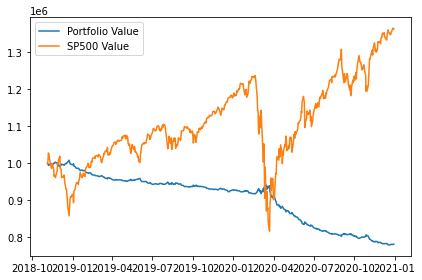

In [187]:
# Plot graph
graph(final_pf1)


----------------------------------------
# Back Test Key Results:
# Correlation: -0.9743703269084453
# CAPM Annualised Sharpe Ratio: -3.21
# Calmar Ratio: -0.5
# Max Drawdown ($): 228474.0
# Max Drawdown (%): -0.22658488610240746
# Max_dd_duration: 508.0
AxesSubplot(0.125,0.125;0.775x0.755)

----------------------------------------



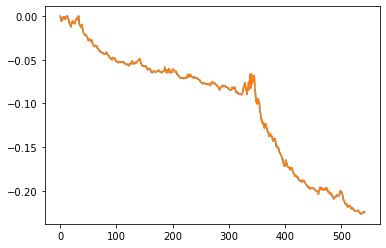

In [188]:
# Backtest Results
CR = round(calmarratio(final_pf1['Portfolio Returns'],final_pf1),3)
Max_dd_value = round(drawdown_value(final_pf1['Portfolio Value'])[0],0)
Max_dd_duration = drawdown_value(final_pf1['Portfolio Value'])[1]
CAPM_AnnualS = round(sharperatio(final_pf1['Portfolio Returns'])[1],3)
Max_dd_percentage = drawdowns(final_pf1['Portfolio Value'],final_pf1).min()
drawdowns(final_pf1['Portfolio Value'],final_pf1).plot()
Correlation = final_pf1['Portfolio Returns'].corr(final_pf1['SP500 Returns'])
Annualised_Returns = final_pf1

backtest_result = f"""
{'-'*40}
# Back Test Key Results:
# Correlation: {Correlation}
# CAPM Annualised Sharpe Ratio: {CAPM_AnnualS}
# Calmar Ratio: {CR}
# Max Drawdown ($): {Max_dd_value}
# Max Drawdown (%): {Max_dd_percentage}
# Max_dd_duration: {Max_dd_duration}
{drawdowns(final_pf1['Portfolio Value'],final_pf1).plot()}

{'-'*40}
"""

print(backtest_result)

Overall trading volume is not a good trading signal along with the factor MRP.

# Exploratory 2: Value Ratio

Here we are using two main ratios to estimate a firm's intrinsic value. A high PE Ratio may attract growth investors who are looking for higher rate of earnings growth while a low PE Ratio may attract value investors that believe its intrinsic value is undervalued by the market.

The PS Ratio can be used for firms with abnormal growth rates. 

In [102]:
# Running the regression
beta_dict = {'Ticker': tickers, 
             'MRP Beta': [], 'MRP P Value': [],
             'Log PE Ratio Beta': [], 'Log PE Ratio P Value': [],
             'PS Ratio Beta': [], 'PS Ratio P Value': [],
             'Alpha': []}
count = 0

int_col = ['Market Risk Premium','Log PE Ratio','PS Ratio']

for ticker in tickers:
    beta_value, alpha, p_value = linearReg(ticker, maindf, int_col)
    beta_dict['MRP Beta'].append(beta_value[0])
    beta_dict['MRP P Value'].append(p_value[0])
    beta_dict['Log PE Ratio Beta'].append(beta_value[1])
    beta_dict['Log PE Ratio P Value'].append(p_value[1])
    beta_dict['PS Ratio Beta'].append(beta_value[2])
    beta_dict['PS Ratio P Value'].append(p_value[2])
    beta_dict['Alpha'].append(alpha)
    count += 1
    print(f'---Completed {ticker} => count: {count}')
    
df_pf2 = pd.DataFrame(beta_dict)

---Completed A => count: 1
---Completed AA => count: 2
---Completed AAL => count: 3
---Completed AAP => count: 4
---Completed AAPL => count: 5
---Completed AB => count: 6
---Completed ABB => count: 7
---Completed ABC => count: 8
---Completed ABM => count: 9
---Completed ABT => count: 10
---Completed ACGL => count: 11
---Completed ACIW => count: 12
---Completed ACM => count: 13
---Completed ACN => count: 14
---Completed ADBE => count: 15
---Completed ADI => count: 16
---Completed ADM => count: 17
---Completed ADP => count: 18
---Completed ADSK => count: 19
---Completed AEE => count: 20
---Completed AEO => count: 21
---Completed AEP => count: 22
---Completed AES => count: 23
---Completed AFG => count: 24
---Completed AFL => count: 25
---Completed AGCO => count: 26
---Completed AGNC => count: 27
---Completed AGO => count: 28
---Completed AIG => count: 29
---Completed AIT => count: 30
---Completed AIV => count: 31
---Completed AIZ => count: 32
---Completed AJG => count: 33
---Completed AKA

---Completed EQC => count: 268
---Completed EQIX => count: 269
---Completed EQR => count: 270
---Completed EQT => count: 271
---Completed ES => count: 272
---Completed ESGR => count: 273
---Completed ESS => count: 274
---Completed ET => count: 275
---Completed ETN => count: 276
---Completed ETR => count: 277
---Completed EVR => count: 278
---Completed EVRG => count: 279
---Completed EW => count: 280
---Completed EWBC => count: 281
---Completed EXC => count: 282
---Completed EXEL => count: 283
---Completed EXP => count: 284
---Completed EXPD => count: 285
---Completed EXPE => count: 286
---Completed EXR => count: 287
---Completed F => count: 288
---Completed FAST => count: 289
---Completed FCN => count: 290
---Completed FCX => count: 291
---Completed FDP => count: 292
---Completed FDS => count: 293
---Completed FDX => count: 294
---Completed FE => count: 295
---Completed FFIN => count: 296
---Completed FFIV => count: 297
---Completed FHI => count: 298
---Completed FHN => count: 299
---C

---Completed MTX => count: 533
---Completed MTZ => count: 534
---Completed MU => count: 535
---Completed MUR => count: 536
---Completed MYGN => count: 537
---Completed NATI => count: 538
---Completed NBIX => count: 539
---Completed NBR => count: 540
---Completed NCR => count: 541
---Completed NDAQ => count: 542
---Completed NDSN => count: 543
---Completed NEE => count: 544
---Completed NEM => count: 545
---Completed NEOG => count: 546
---Completed NEU => count: 547
---Completed NFG => count: 548
---Completed NFLX => count: 549
---Completed NHI => count: 550
---Completed NI => count: 551
---Completed NJR => count: 552
---Completed NKE => count: 553
---Completed NLY => count: 554
---Completed NNN => count: 555
---Completed NOC => count: 556
---Completed NOV => count: 557
---Completed NRG => count: 558
---Completed NS => count: 559
---Completed NSC => count: 560
---Completed NTAP => count: 561
---Completed NTES => count: 562
---Completed NTRS => count: 563
---Completed NUE => count: 564
-

---Completed TXT => count: 796
---Completed TYL => count: 797
---Completed UAA => count: 798
---Completed UAL => count: 799
---Completed UBSI => count: 800
---Completed UDR => count: 801
---Completed UGI => count: 802
---Completed UHAL => count: 803
---Completed UHS => count: 804
---Completed ULTA => count: 805
---Completed UMBF => count: 806
---Completed UNF => count: 807
---Completed UNFI => count: 808
---Completed UNH => count: 809
---Completed UNM => count: 810
---Completed UNP => count: 811
---Completed UPS => count: 812
---Completed URBN => count: 813
---Completed URI => count: 814
---Completed USB => count: 815
---Completed USM => count: 816
---Completed UTHR => count: 817
---Completed V => count: 818
---Completed VFC => count: 819
---Completed VHI => count: 820
---Completed VIAV => count: 821
---Completed VLO => count: 822
---Completed VLY => count: 823
---Completed VMC => count: 824
---Completed VMI => count: 825
---Completed VMW => count: 826
---Completed VNO => count: 827
--

In [103]:
df_pf2

,Ticker,MRP Beta,MRP P Value,Log PE Ratio Beta,Log PE Ratio P Value,PS Ratio Beta,PS Ratio P Value,Alpha
0,A,1.439106,0.000000e+00,0.000091,0.665649,0.000165,0.565609,-0.000667
1,AA,1.362442,1.677186e-66,-0.002291,0.237450,0.016631,0.166103,-0.002569
2,AAL,1.383779,2.915559e-86,-0.000675,0.480813,-0.001056,0.385132,0.001344
3,AAP,0.779884,7.394663e-80,-0.001359,0.472791,0.000369,0.697255,0.004106
4,AAPL,0.959133,1.250261e-179,0.005126,0.256322,-0.000954,0.352236,-0.009969
...,...,...,...,...,...,...,...,...
874,XRX,1.267223,3.906351e-236,-0.000336,0.707683,-0.000567,0.461237,0.001008
875,YUM,0.909865,1.578987e-197,-0.000736,0.299458,-0.000009,0.939680,0.002612
876,ZBH,0.917347,1.181511e-224,0.000129,0.805884,0.000117,0.958638,-0.000707
877,ZBRA,1.172480,6.850773e-158,0.000603,0.670928,0.000930,0.441976,-0.003498


In [104]:
# select stocks to buy/sell
positions(df_pf2)

Number of Buy : 386
Number of Sell : 493


,Ticker,MRP Beta,MRP P Value,Log PE Ratio Beta,Log PE Ratio P Value,PS Ratio Beta,PS Ratio P Value,Alpha,Position
0,A,1.439106,0.000000e+00,0.000091,0.665649,0.000165,0.565609,-0.000667,Sell
1,AA,1.362442,1.677186e-66,-0.002291,0.237450,0.016631,0.166103,-0.002569,Sell
2,AAL,1.383779,2.915559e-86,-0.000675,0.480813,-0.001056,0.385132,0.001344,Buy
3,AAP,0.779884,7.394663e-80,-0.001359,0.472791,0.000369,0.697255,0.004106,Buy
4,AAPL,0.959133,1.250261e-179,0.005126,0.256322,-0.000954,0.352236,-0.009969,Sell
...,...,...,...,...,...,...,...,...,...
874,XRX,1.267223,3.906351e-236,-0.000336,0.707683,-0.000567,0.461237,0.001008,Buy
875,YUM,0.909865,1.578987e-197,-0.000736,0.299458,-0.000009,0.939680,0.002612,Buy
876,ZBH,0.917347,1.181511e-224,0.000129,0.805884,0.000117,0.958638,-0.000707,Sell
877,ZBRA,1.172480,6.850773e-158,0.000603,0.670928,0.000930,0.441976,-0.003498,Sell


In [105]:
# Select relevant columns
tempdf = maindf[['Date', 'Ticker','Market Risk Premium','Log PE Ratio','PS Ratio','SP500 Returns']]

# Set index
tempdf = tempdf.set_index('Ticker')
df_pf2 = df_pf2.set_index('Ticker')

# Merge
df_pf2 = tempdf.merge(df_pf2, how='left', left_index=True, right_index=True)
df_pf2 = df_pf2.reset_index()
df_pf2

,Ticker,Date,Market Risk Premium,Log PE Ratio,PS Ratio,SP500 Returns,MRP Beta,MRP P Value,Log PE Ratio Beta,Log PE Ratio P Value,PS Ratio Beta,PS Ratio P Value,Alpha,Position
0,A,2010-03-31,-0.003352,3.994211,2.225,-0.003273,1.439106,0.000000e+00,0.000091,0.665649,0.000165,0.565609,-0.000667,Sell
1,A,2010-04-01,0.007335,3.994211,2.225,0.007414,1.439106,0.000000e+00,0.000091,0.665649,0.000165,0.565609,-0.000667,Sell
2,A,2010-04-05,0.007849,3.994211,2.225,0.007928,1.439106,0.000000e+00,0.000091,0.665649,0.000165,0.565609,-0.000667,Sell
3,A,2010-04-06,0.001605,3.994211,2.225,0.001684,1.439106,0.000000e+00,0.000091,0.665649,0.000165,0.565609,-0.000667,Sell
4,A,2010-04-07,-0.005956,3.994211,2.225,-0.005877,1.439106,0.000000e+00,0.000091,0.665649,0.000165,0.565609,-0.000667,Sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291745,ZION,2020-12-23,0.000666,2.486905,2.312,0.000746,1.229108,1.381472e-169,-0.000859,0.515863,-0.000243,0.481817,0.003358,Buy
2291746,ZION,2020-12-24,0.003457,2.486905,2.312,0.003537,1.229108,1.381472e-169,-0.000859,0.515863,-0.000243,0.481817,0.003358,Buy
2291747,ZION,2020-12-28,0.008643,2.486905,2.312,0.008723,1.229108,1.381472e-169,-0.000859,0.515863,-0.000243,0.481817,0.003358,Buy
2291748,ZION,2020-12-29,-0.002307,2.486905,2.312,-0.002227,1.229108,1.381472e-169,-0.000859,0.515863,-0.000243,0.481817,0.003358,Buy


In [107]:
# Calculate expected return
df_pf2['Expected Return'] = df_pf2['Alpha'] + df_pf2['MRP Beta']*df_pf2['Market Risk Premium'] + df_pf2['Log PE Ratio Beta']*df_pf2['Log PE Ratio'] + df_pf2['PS Ratio Beta']*df_pf2['PS Ratio']
df_pf2

,Ticker,Date,Market Risk Premium,Log PE Ratio,PS Ratio,SP500 Returns,MRP Beta,MRP P Value,Log PE Ratio Beta,Log PE Ratio P Value,PS Ratio Beta,PS Ratio P Value,Alpha,Position,Expected Return
0,A,2010-03-31,-0.003352,3.994211,2.225,-0.003273,1.439106,0.000000e+00,0.000091,0.665649,0.000165,0.565609,-0.000667,Sell,-0.004762
1,A,2010-04-01,0.007335,3.994211,2.225,0.007414,1.439106,0.000000e+00,0.000091,0.665649,0.000165,0.565609,-0.000667,Sell,0.010617
2,A,2010-04-05,0.007849,3.994211,2.225,0.007928,1.439106,0.000000e+00,0.000091,0.665649,0.000165,0.565609,-0.000667,Sell,0.011357
3,A,2010-04-06,0.001605,3.994211,2.225,0.001684,1.439106,0.000000e+00,0.000091,0.665649,0.000165,0.565609,-0.000667,Sell,0.002372
4,A,2010-04-07,-0.005956,3.994211,2.225,-0.005877,1.439106,0.000000e+00,0.000091,0.665649,0.000165,0.565609,-0.000667,Sell,-0.008509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291745,ZION,2020-12-23,0.000666,2.486905,2.312,0.000746,1.229108,1.381472e-169,-0.000859,0.515863,-0.000243,0.481817,0.003358,Buy,0.001478
2291746,ZION,2020-12-24,0.003457,2.486905,2.312,0.003537,1.229108,1.381472e-169,-0.000859,0.515863,-0.000243,0.481817,0.003358,Buy,0.004908
2291747,ZION,2020-12-28,0.008643,2.486905,2.312,0.008723,1.229108,1.381472e-169,-0.000859,0.515863,-0.000243,0.481817,0.003358,Buy,0.011282
2291748,ZION,2020-12-29,-0.002307,2.486905,2.312,-0.002227,1.229108,1.381472e-169,-0.000859,0.515863,-0.000243,0.481817,0.003358,Buy,-0.002176


In [108]:
# Run portfolio returns function
dfp2 = portfolioreturns(df_pf2)
dfp2

,Date,Portfolio Returns
0,2010-03-31,-0.000057
1,2010-04-01,-0.000276
2,2010-04-05,-0.000287
3,2010-04-06,-0.000156
4,2010-04-07,0.000002
...,...,...
2703,2020-12-23,-0.000065
2704,2020-12-24,-0.000134
2705,2020-12-28,-0.000263
2706,2020-12-29,0.000009


In [189]:
# Run portfolio calculator
final_pf2 = portfoliocalculator(dfp2, sp500)
final_pf2

,Date,Portfolio Returns,SP500 Returns,Portfolio Value,Portfolio PnL,SP500 Value,SP500 PnL
0,2018-11-05,0.000000,0.000000,1.000000e+06,0.000000,1.000000e+06,0.000000
1,2018-11-06,-0.000169,0.006259,9.998307e+05,-169.336840,1.006259e+06,6259.335137
2,2018-11-07,-0.000444,0.021209,9.993866e+05,-444.058639,1.027601e+06,21341.630422
3,2018-11-08,-0.000008,-0.002509,9.993784e+05,-8.155832,1.025023e+06,-2578.232559
4,2018-11-09,0.000115,-0.009199,9.994932e+05,114.741068,1.015594e+06,-9429.173468
...,...,...,...,...,...,...,...
537,2020-12-23,-0.000065,0.000746,1.048224e+06,-68.162554,1.347550e+06,1004.269056
538,2020-12-24,-0.000134,0.003537,1.048083e+06,-140.807771,1.352316e+06,4765.713159
539,2020-12-28,-0.000263,0.008723,1.047808e+06,-275.771984,1.364111e+06,11795.596554
540,2020-12-29,0.000009,-0.002227,1.047817e+06,9.236357,1.361073e+06,-3038.370382


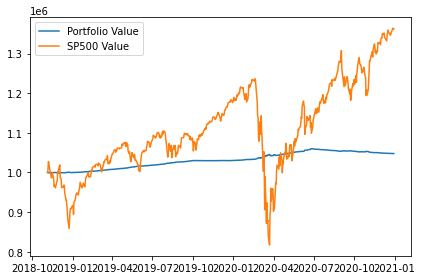

In [190]:
# Plot graph
graph(final_pf2)


----------------------------------------
# Back Test Key Results:
# Correlation: -0.9418409198718988
# CAPM Annualised Sharpe Ratio: 0.276
# Calmar Ratio: 1.863
# Max Drawdown ($): 12349.0
# Max Drawdown (%): -0.011649017103703918
# Max_dd_duration: 129.0
AxesSubplot(0.125,0.125;0.775x0.755)

----------------------------------------



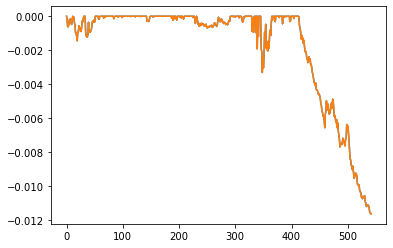

In [191]:
# Backtest Results
CR = round(calmarratio(final_pf2['Portfolio Returns'],final_pf2),3)
Max_dd_value = round(drawdown_value(final_pf2['Portfolio Value'])[0],0)
Max_dd_duration = drawdown_value(final_pf2['Portfolio Value'])[1]
CAPM_AnnualS = round(sharperatio(final_pf2['Portfolio Returns'])[1],3)
Max_dd_percentage = drawdowns(final_pf2['Portfolio Value'],final_pf2).min()
drawdowns(final_pf2['Portfolio Value'],final_pf2).plot()
Correlation = final_pf2['Portfolio Returns'].corr(final_pf2['SP500 Returns'])
Annualised_Returns = final_pf2

backtest_result = f"""
{'-'*40}
# Back Test Key Results:
# Correlation: {Correlation}
# CAPM Annualised Sharpe Ratio: {CAPM_AnnualS}
# Calmar Ratio: {CR}
# Max Drawdown ($): {Max_dd_value}
# Max Drawdown (%): {Max_dd_percentage}
# Max_dd_duration: {Max_dd_duration}
{drawdowns(final_pf2['Portfolio Value'],final_pf2).plot()}

{'-'*40}
"""

print(backtest_result)

Similarly, the value ratios are not very good indicators of stock performance. We see barely any movements in our portfolio value for the duration of the test set.

# Exploratory 3: Profitability Indicators

Interest coverage ratio signals the firm's ability to pay interest due on its outstanding debt. A higher ratio entails a better capital management to meet its interest obligations. 
Higher EBITDA Margin indicates the firm's better management of cash flow and operating expenses.
Higher ROE Ratio indicates the ability of a firm to better convert its equity financing into profits.

In [132]:
# Running the regression
beta_dict = {'Ticker': tickers, 
             'MRP Beta': [], 'MRP P Value': [],
             'Log EBITDA Margin Beta': [], 'Log EBITDA Margin P Value': [],
             'ICR Ratio Beta': [], 'ICR Ratio P Value': [],
             'ROE Ratio Beta': [], 'ROE Ratio P Value': [],
             'Alpha': []}
count = 0

int_col = ['Market Risk Premium','Log EBITDA Margin','ICR Ratio','ROE Ratio']

for ticker in tickers:
    beta_value, alpha, p_value = linearReg(ticker, maindf, int_col)
    beta_dict['MRP Beta'].append(beta_value[0])
    beta_dict['MRP P Value'].append(p_value[0])
    beta_dict['Log EBITDA Margin Beta'].append(beta_value[1])
    beta_dict['Log EBITDA Margin P Value'].append(p_value[1])
    beta_dict['ICR Ratio Beta'].append(beta_value[2])
    beta_dict['ICR Ratio P Value'].append(p_value[2])
    beta_dict['ROE Ratio Beta'].append(beta_value[3])
    beta_dict['ROE Ratio P Value'].append(p_value[3])
    beta_dict['Alpha'].append(alpha)
    count += 1
    print(f'---Completed {ticker} => count: {count}')
    
df_pf3 = pd.DataFrame(beta_dict)

---Completed A => count: 1
---Completed AA => count: 2
---Completed AAL => count: 3
---Completed AAP => count: 4
---Completed AAPL => count: 5
---Completed AB => count: 6
---Completed ABB => count: 7
---Completed ABC => count: 8
---Completed ABM => count: 9
---Completed ABT => count: 10
---Completed ACGL => count: 11
---Completed ACIW => count: 12
---Completed ACM => count: 13
---Completed ACN => count: 14
---Completed ADBE => count: 15
---Completed ADI => count: 16
---Completed ADM => count: 17
---Completed ADP => count: 18
---Completed ADSK => count: 19
---Completed AEE => count: 20
---Completed AEO => count: 21
---Completed AEP => count: 22
---Completed AES => count: 23
---Completed AFG => count: 24
---Completed AFL => count: 25
---Completed AGCO => count: 26
---Completed AGNC => count: 27
---Completed AGO => count: 28
---Completed AIG => count: 29
---Completed AIT => count: 30
---Completed AIV => count: 31
---Completed AIZ => count: 32
---Completed AJG => count: 33
---Completed AKA

---Completed EQIX => count: 269
---Completed EQR => count: 270
---Completed EQT => count: 271
---Completed ES => count: 272
---Completed ESGR => count: 273
---Completed ESS => count: 274
---Completed ET => count: 275
---Completed ETN => count: 276
---Completed ETR => count: 277
---Completed EVR => count: 278
---Completed EVRG => count: 279
---Completed EW => count: 280
---Completed EWBC => count: 281
---Completed EXC => count: 282
---Completed EXEL => count: 283
---Completed EXP => count: 284
---Completed EXPD => count: 285
---Completed EXPE => count: 286
---Completed EXR => count: 287
---Completed F => count: 288
---Completed FAST => count: 289
---Completed FCN => count: 290
---Completed FCX => count: 291
---Completed FDP => count: 292
---Completed FDS => count: 293
---Completed FDX => count: 294
---Completed FE => count: 295
---Completed FFIN => count: 296
---Completed FFIV => count: 297
---Completed FHI => count: 298
---Completed FHN => count: 299
---Completed FICO => count: 300
---

---Completed MTZ => count: 534
---Completed MU => count: 535
---Completed MUR => count: 536
---Completed MYGN => count: 537
---Completed NATI => count: 538
---Completed NBIX => count: 539
---Completed NBR => count: 540
---Completed NCR => count: 541
---Completed NDAQ => count: 542
---Completed NDSN => count: 543
---Completed NEE => count: 544
---Completed NEM => count: 545
---Completed NEOG => count: 546
---Completed NEU => count: 547
---Completed NFG => count: 548
---Completed NFLX => count: 549
---Completed NHI => count: 550
---Completed NI => count: 551
---Completed NJR => count: 552
---Completed NKE => count: 553
---Completed NLY => count: 554
---Completed NNN => count: 555
---Completed NOC => count: 556
---Completed NOV => count: 557
---Completed NRG => count: 558
---Completed NS => count: 559
---Completed NSC => count: 560
---Completed NTAP => count: 561
---Completed NTES => count: 562
---Completed NTRS => count: 563
---Completed NUE => count: 564
---Completed NUS => count: 565
-

---Completed UAL => count: 799
---Completed UBSI => count: 800
---Completed UDR => count: 801
---Completed UGI => count: 802
---Completed UHAL => count: 803
---Completed UHS => count: 804
---Completed ULTA => count: 805
---Completed UMBF => count: 806
---Completed UNF => count: 807
---Completed UNFI => count: 808
---Completed UNH => count: 809
---Completed UNM => count: 810
---Completed UNP => count: 811
---Completed UPS => count: 812
---Completed URBN => count: 813
---Completed URI => count: 814
---Completed USB => count: 815
---Completed USM => count: 816
---Completed UTHR => count: 817
---Completed V => count: 818
---Completed VFC => count: 819
---Completed VHI => count: 820
---Completed VIAV => count: 821
---Completed VLO => count: 822
---Completed VLY => count: 823
---Completed VMC => count: 824
---Completed VMI => count: 825
---Completed VMW => count: 826
---Completed VNO => count: 827
---Completed VRNT => count: 828
---Completed VRSK => count: 829
---Completed VRSN => count: 830

In [133]:
df_pf3

,Ticker,MRP Beta,MRP P Value,Log EBITDA Margin Beta,Log EBITDA Margin P Value,ICR Ratio Beta,ICR Ratio P Value,ROE Ratio Beta,ROE Ratio P Value,Alpha
0,A,1.438613,0.000000e+00,0.001599,0.490225,-0.000121,0.896412,0.005635,0.721820,-0.000934
1,AA,1.349926,1.677186e-66,-0.023082,0.007476,0.002839,0.002574,0.208867,0.201134,-0.236502
2,AAL,1.386101,2.915559e-86,-0.000891,0.800398,0.000087,0.871465,0.007711,0.952135,-0.009890
3,AAP,0.780686,7.394663e-80,0.000353,0.518684,0.000211,0.310602,-0.035411,0.878141,0.028699
4,AAPL,0.957444,1.250261e-179,-0.002723,0.147206,0.000000,NaN,-0.017303,0.272598,0.013195
...,...,...,...,...,...,...,...,...,...,...
874,XRX,1.266979,3.906351e-236,-0.000660,0.935714,0.000000,NaN,0.007171,0.567286,-0.007639
875,YUM,0.910683,1.578987e-197,0.000085,0.954786,-0.000052,0.806127,-0.001934,0.883950,0.002850
876,ZBH,0.916551,1.181511e-224,-0.001848,0.296080,0.000046,0.859659,-0.005335,0.361268,0.001680
877,ZBRA,1.172330,6.850773e-158,-0.001432,0.908255,0.000946,0.575101,0.026141,0.955895,-0.023961


In [134]:
# select stocks to buy/sell
positions(df_pf3)

Number of Buy : 413
Number of Sell : 466


,Ticker,MRP Beta,MRP P Value,Log EBITDA Margin Beta,Log EBITDA Margin P Value,ICR Ratio Beta,ICR Ratio P Value,ROE Ratio Beta,ROE Ratio P Value,Alpha,Position
0,A,1.438613,0.000000e+00,0.001599,0.490225,-0.000121,0.896412,0.005635,0.721820,-0.000934,Sell
1,AA,1.349926,1.677186e-66,-0.023082,0.007476,0.002839,0.002574,0.208867,0.201134,-0.236502,Sell
2,AAL,1.386101,2.915559e-86,-0.000891,0.800398,0.000087,0.871465,0.007711,0.952135,-0.009890,Sell
3,AAP,0.780686,7.394663e-80,0.000353,0.518684,0.000211,0.310602,-0.035411,0.878141,0.028699,Buy
4,AAPL,0.957444,1.250261e-179,-0.002723,0.147206,0.000000,NaN,-0.017303,0.272598,0.013195,Buy
...,...,...,...,...,...,...,...,...,...,...,...
874,XRX,1.266979,3.906351e-236,-0.000660,0.935714,0.000000,NaN,0.007171,0.567286,-0.007639,Sell
875,YUM,0.910683,1.578987e-197,0.000085,0.954786,-0.000052,0.806127,-0.001934,0.883950,0.002850,Buy
876,ZBH,0.916551,1.181511e-224,-0.001848,0.296080,0.000046,0.859659,-0.005335,0.361268,0.001680,Buy
877,ZBRA,1.172330,6.850773e-158,-0.001432,0.908255,0.000946,0.575101,0.026141,0.955895,-0.023961,Sell


In [135]:
# Select relevant columns
tempdf = maindf[['Date', 'Ticker','Market Risk Premium','Log EBITDA Margin','ICR Ratio','ROE Ratio','SP500 Returns']]

# Set index
tempdf = tempdf.set_index('Ticker')
df_pf3 = df_pf3.set_index('Ticker')

# Merge
df_pf3 = tempdf.merge(df_pf3, how='left', left_index=True, right_index=True)
df_pf3 = df_pf3.reset_index()
df_pf3

,Ticker,Date,Market Risk Premium,Log EBITDA Margin,ICR Ratio,ROE Ratio,SP500 Returns,MRP Beta,MRP P Value,Log EBITDA Margin Beta,Log EBITDA Margin P Value,ICR Ratio Beta,ICR Ratio P Value,ROE Ratio Beta,ROE Ratio P Value,Alpha,Position
0,A,2010-03-31,-0.003352,-1.864330,7.318182,0.852899,-0.003273,1.438613,0.000000e+00,0.001599,0.490225,-0.000121,0.896412,0.005635,0.721820,-0.000934,Sell
1,A,2010-04-01,0.007335,-1.864330,7.318182,0.852899,0.007414,1.438613,0.000000e+00,0.001599,0.490225,-0.000121,0.896412,0.005635,0.721820,-0.000934,Sell
2,A,2010-04-05,0.007849,-1.864330,7.318182,0.852899,0.007928,1.438613,0.000000e+00,0.001599,0.490225,-0.000121,0.896412,0.005635,0.721820,-0.000934,Sell
3,A,2010-04-06,0.001605,-1.864330,7.318182,0.852899,0.001684,1.438613,0.000000e+00,0.001599,0.490225,-0.000121,0.896412,0.005635,0.721820,-0.000934,Sell
4,A,2010-04-07,-0.005956,-1.864330,7.318182,0.852899,-0.005877,1.438613,0.000000e+00,0.001599,0.490225,-0.000121,0.896412,0.005635,0.721820,-0.000934,Sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291745,ZION,2020-12-23,0.000666,-1.634756,0.000000,0.785057,0.000746,1.228779,1.381472e-169,0.001028,0.378559,0.000000,NaN,-0.012219,0.815276,0.011105,Buy
2291746,ZION,2020-12-24,0.003457,-1.634756,0.000000,0.785057,0.003537,1.228779,1.381472e-169,0.001028,0.378559,0.000000,NaN,-0.012219,0.815276,0.011105,Buy
2291747,ZION,2020-12-28,0.008643,-1.634756,0.000000,0.785057,0.008723,1.228779,1.381472e-169,0.001028,0.378559,0.000000,NaN,-0.012219,0.815276,0.011105,Buy
2291748,ZION,2020-12-29,-0.002307,-1.634756,0.000000,0.785057,-0.002227,1.228779,1.381472e-169,0.001028,0.378559,0.000000,NaN,-0.012219,0.815276,0.011105,Buy


In [138]:
# Calculate expected return
df_pf3['Expected Return'] = df_pf3['Alpha'] + df_pf3['MRP Beta']*df_pf3['Market Risk Premium'] + df_pf3['Log EBITDA Margin Beta']*df_pf3['Log EBITDA Margin'] + df_pf3['ICR Ratio Beta']*df_pf3['ICR Ratio'] + df_pf3['ROE Ratio Beta']*df_pf3['ROE Ratio']
df_pf3

,Ticker,Date,Market Risk Premium,Log EBITDA Margin,ICR Ratio,ROE Ratio,SP500 Returns,MRP Beta,MRP P Value,Log EBITDA Margin Beta,Log EBITDA Margin P Value,ICR Ratio Beta,ICR Ratio P Value,ROE Ratio Beta,ROE Ratio P Value,Alpha,Position,Expected Return
0,A,2010-03-31,-0.003352,-1.864330,7.318182,0.852899,-0.003273,1.438613,0.000000e+00,0.001599,0.490225,-0.000121,0.896412,0.005635,0.721820,-0.000934,Sell,-0.004816
1,A,2010-04-01,0.007335,-1.864330,7.318182,0.852899,0.007414,1.438613,0.000000e+00,0.001599,0.490225,-0.000121,0.896412,0.005635,0.721820,-0.000934,Sell,0.010558
2,A,2010-04-05,0.007849,-1.864330,7.318182,0.852899,0.007928,1.438613,0.000000e+00,0.001599,0.490225,-0.000121,0.896412,0.005635,0.721820,-0.000934,Sell,0.011298
3,A,2010-04-06,0.001605,-1.864330,7.318182,0.852899,0.001684,1.438613,0.000000e+00,0.001599,0.490225,-0.000121,0.896412,0.005635,0.721820,-0.000934,Sell,0.002316
4,A,2010-04-07,-0.005956,-1.864330,7.318182,0.852899,-0.005877,1.438613,0.000000e+00,0.001599,0.490225,-0.000121,0.896412,0.005635,0.721820,-0.000934,Sell,-0.008562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291745,ZION,2020-12-23,0.000666,-1.634756,0.000000,0.785057,0.000746,1.228779,1.381472e-169,0.001028,0.378559,0.000000,NaN,-0.012219,0.815276,0.011105,Buy,0.000652
2291746,ZION,2020-12-24,0.003457,-1.634756,0.000000,0.785057,0.003537,1.228779,1.381472e-169,0.001028,0.378559,0.000000,NaN,-0.012219,0.815276,0.011105,Buy,0.004081
2291747,ZION,2020-12-28,0.008643,-1.634756,0.000000,0.785057,0.008723,1.228779,1.381472e-169,0.001028,0.378559,0.000000,NaN,-0.012219,0.815276,0.011105,Buy,0.010453
2291748,ZION,2020-12-29,-0.002307,-1.634756,0.000000,0.785057,-0.002227,1.228779,1.381472e-169,0.001028,0.378559,0.000000,NaN,-0.012219,0.815276,0.011105,Buy,-0.003002


In [139]:
# Run portfolio returns function
dfp3 = portfolioreturns(df_pf3)
dfp3

,Date,Portfolio Returns
0,2010-03-31,0.000428
1,2010-04-01,-0.000030
2,2010-04-05,-0.000054
3,2010-04-06,0.000230
4,2010-04-07,0.000574
...,...,...
2703,2020-12-23,-0.000294
2704,2020-12-24,-0.000394
2705,2020-12-28,-0.000579
2706,2020-12-29,-0.000187


In [192]:
# Run portfolio calculator
final_pf3 = portfoliocalculator(dfp3, sp500)
final_pf3

,Date,Portfolio Returns,SP500 Returns,Portfolio Value,Portfolio PnL,SP500 Value,SP500 PnL
0,2018-11-05,0.000000,0.000000,1000000.000000,0.000000,1.000000e+06,0.000000
1,2018-11-06,-0.000149,0.006259,999850.835235,-149.164765,1.006259e+06,6259.335137
2,2018-11-07,-0.000610,0.021209,999241.165541,-609.669694,1.027601e+06,21341.630422
3,2018-11-08,0.000121,-0.002509,999362.061118,120.895577,1.025023e+06,-2578.232559
4,2018-11-09,0.000327,-0.009199,999688.959182,326.898064,1.015594e+06,-9429.173468
...,...,...,...,...,...,...,...
537,2020-12-23,-0.000294,0.000746,763829.931726,-224.415452,1.347550e+06,1004.269056
538,2020-12-24,-0.000394,0.003537,763529.330674,-300.601053,1.352316e+06,4765.713159
539,2020-12-28,-0.000579,0.008723,763087.235552,-442.095122,1.364111e+06,11795.596554
540,2020-12-29,-0.000187,-0.002227,762944.216029,-143.019523,1.361073e+06,-3038.370382


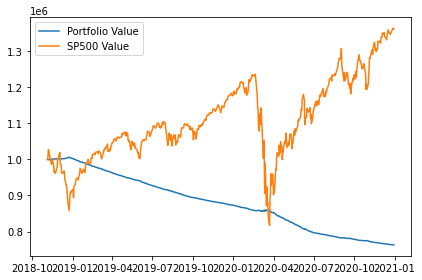

In [193]:
# Plot graph
graph(final_pf3)


----------------------------------------
# Back Test Key Results:
# Correlation: -0.9142687595942773
# CAPM Annualised Sharpe Ratio: -15.054
# Calmar Ratio: -0.52
# Max Drawdown ($): 243343.0
# Max Drawdown (%): -0.2418806780585928
# Max_dd_duration: 508.0
AxesSubplot(0.125,0.125;0.775x0.755)

----------------------------------------



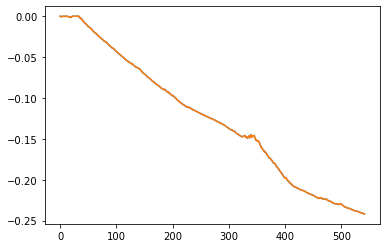

In [194]:
# Backtest Results
CR = round(calmarratio(final_pf3['Portfolio Returns'],final_pf3),3)
Max_dd_value = round(drawdown_value(final_pf3['Portfolio Value'])[0],0)
Max_dd_duration = drawdown_value(final_pf3['Portfolio Value'])[1]
CAPM_AnnualS = round(sharperatio(final_pf3['Portfolio Returns'])[1],3)
Max_dd_percentage = drawdowns(final_pf3['Portfolio Value'],final_pf3).min()
drawdowns(final_pf3['Portfolio Value'],final_pf3).plot()
Correlation = final_pf3['Portfolio Returns'].corr(final_pf3['SP500 Returns'])
Annualised_Returns = final_pf3

backtest_result = f"""
{'-'*40}
# Back Test Key Results:
# Correlation: {Correlation}
# CAPM Annualised Sharpe Ratio: {CAPM_AnnualS}
# Calmar Ratio: {CR}
# Max Drawdown ($): {Max_dd_value}
# Max Drawdown (%): {Max_dd_percentage}
# Max_dd_duration: {Max_dd_duration}
{drawdowns(final_pf3['Portfolio Value'],final_pf3).plot()}

{'-'*40}
"""

print(backtest_result)

Similarly, the profitability factors are not very good indicators of stock performance. We see barely any movements in our portfolio value for the duration of the test set.

## Exploratory 4: Growth Factors

We believe revenue growth rate, debt to equity ratio and amount invested in RND are good indicators of growth for firms.

In [165]:
maindf['RND(MM)'] = maindf['RND']/1000000 

In [166]:
# Running the regression
beta_dict = {'Ticker': tickers, 
             'MRP Beta': [], 'MRP P Value': [],
             'RND(MM) Beta': [], 'RND(MM) P Value': [],
             'Log DE Ratio Beta': [], 'Log DE Ratio P Value': [],
             'Revenue Growth Beta': [], 'Revenue Growth P Value': [],
             'Alpha': []}
count = 0

int_col = ['Market Risk Premium','RND(MM)','Log DE Ratio','Revenue Growth']

for ticker in tickers:
    beta_value, alpha, p_value = linearReg(ticker, maindf, int_col)
    beta_dict['MRP Beta'].append(beta_value[0])
    beta_dict['MRP P Value'].append(p_value[0])
    beta_dict['RND(MM) Beta'].append(beta_value[1])
    beta_dict['RND(MM) P Value'].append(p_value[1])
    beta_dict['Log DE Ratio Beta'].append(beta_value[2])
    beta_dict['Log DE Ratio P Value'].append(p_value[2])
    beta_dict['Revenue Growth Beta'].append(beta_value[3])
    beta_dict['Revenue Growth P Value'].append(p_value[3])
    beta_dict['Alpha'].append(alpha)
    count += 1
    print(f'---Completed {ticker} => count: {count}')
    
df_pf4 = pd.DataFrame(beta_dict)

---Completed A => count: 1
---Completed AA => count: 2
---Completed AAL => count: 3
---Completed AAP => count: 4
---Completed AAPL => count: 5
---Completed AB => count: 6
---Completed ABB => count: 7
---Completed ABC => count: 8
---Completed ABM => count: 9
---Completed ABT => count: 10
---Completed ACGL => count: 11
---Completed ACIW => count: 12
---Completed ACM => count: 13
---Completed ACN => count: 14
---Completed ADBE => count: 15
---Completed ADI => count: 16
---Completed ADM => count: 17
---Completed ADP => count: 18
---Completed ADSK => count: 19
---Completed AEE => count: 20
---Completed AEO => count: 21
---Completed AEP => count: 22
---Completed AES => count: 23
---Completed AFG => count: 24
---Completed AFL => count: 25
---Completed AGCO => count: 26
---Completed AGNC => count: 27
---Completed AGO => count: 28
---Completed AIG => count: 29
---Completed AIT => count: 30
---Completed AIV => count: 31
---Completed AIZ => count: 32
---Completed AJG => count: 33
---Completed AKA

---Completed EQIX => count: 269
---Completed EQR => count: 270
---Completed EQT => count: 271
---Completed ES => count: 272
---Completed ESGR => count: 273
---Completed ESS => count: 274
---Completed ET => count: 275
---Completed ETN => count: 276
---Completed ETR => count: 277
---Completed EVR => count: 278
---Completed EVRG => count: 279
---Completed EW => count: 280
---Completed EWBC => count: 281
---Completed EXC => count: 282
---Completed EXEL => count: 283
---Completed EXP => count: 284
---Completed EXPD => count: 285
---Completed EXPE => count: 286
---Completed EXR => count: 287
---Completed F => count: 288
---Completed FAST => count: 289
---Completed FCN => count: 290
---Completed FCX => count: 291
---Completed FDP => count: 292
---Completed FDS => count: 293
---Completed FDX => count: 294
---Completed FE => count: 295
---Completed FFIN => count: 296
---Completed FFIV => count: 297
---Completed FHI => count: 298
---Completed FHN => count: 299
---Completed FICO => count: 300
---

---Completed MTX => count: 533
---Completed MTZ => count: 534
---Completed MU => count: 535
---Completed MUR => count: 536
---Completed MYGN => count: 537
---Completed NATI => count: 538
---Completed NBIX => count: 539
---Completed NBR => count: 540
---Completed NCR => count: 541
---Completed NDAQ => count: 542
---Completed NDSN => count: 543
---Completed NEE => count: 544
---Completed NEM => count: 545
---Completed NEOG => count: 546
---Completed NEU => count: 547
---Completed NFG => count: 548
---Completed NFLX => count: 549
---Completed NHI => count: 550
---Completed NI => count: 551
---Completed NJR => count: 552
---Completed NKE => count: 553
---Completed NLY => count: 554
---Completed NNN => count: 555
---Completed NOC => count: 556
---Completed NOV => count: 557
---Completed NRG => count: 558
---Completed NS => count: 559
---Completed NSC => count: 560
---Completed NTAP => count: 561
---Completed NTES => count: 562
---Completed NTRS => count: 563
---Completed NUE => count: 564
-

---Completed UAA => count: 798
---Completed UAL => count: 799
---Completed UBSI => count: 800
---Completed UDR => count: 801
---Completed UGI => count: 802
---Completed UHAL => count: 803
---Completed UHS => count: 804
---Completed ULTA => count: 805
---Completed UMBF => count: 806
---Completed UNF => count: 807
---Completed UNFI => count: 808
---Completed UNH => count: 809
---Completed UNM => count: 810
---Completed UNP => count: 811
---Completed UPS => count: 812
---Completed URBN => count: 813
---Completed URI => count: 814
---Completed USB => count: 815
---Completed USM => count: 816
---Completed UTHR => count: 817
---Completed V => count: 818
---Completed VFC => count: 819
---Completed VHI => count: 820
---Completed VIAV => count: 821
---Completed VLO => count: 822
---Completed VLY => count: 823
---Completed VMC => count: 824
---Completed VMI => count: 825
---Completed VMW => count: 826
---Completed VNO => count: 827
---Completed VRNT => count: 828
---Completed VRSK => count: 829


In [167]:
df_pf4

,Ticker,MRP Beta,MRP P Value,RND(MM) Beta,RND(MM) P Value,Log DE Ratio Beta,Log DE Ratio P Value,Revenue Growth Beta,Revenue Growth P Value,Alpha
0,A,1.439199,0.000000e+00,-7.281015e-06,0.862228,0.000908,0.564802,0.001400,0.425478,0.001057
1,AA,1.346473,1.677186e-66,1.197064e-02,0.006748,-0.011759,0.004429,-0.117952,0.106173,-0.082369
2,AAL,1.385648,2.915559e-86,0.000000e+00,NaN,0.000443,0.739038,0.004258,0.885429,-0.001943
3,AAP,0.780136,7.394663e-80,-1.084202e-18,NaN,0.000383,0.916602,-0.001637,0.320760,0.000167
4,AAPL,0.958188,1.250261e-179,-9.092352e-07,0.778028,0.001545,0.848258,-0.000457,0.834765,0.002348
...,...,...,...,...,...,...,...,...,...,...
874,XRX,1.267517,3.906351e-236,-4.983217e-06,0.813283,-0.000623,0.890661,0.000185,0.781202,0.000758
875,YUM,0.910599,1.578987e-197,0.000000e+00,NaN,-0.000056,0.875293,-0.001434,0.250247,0.000462
876,ZBH,0.916835,1.181511e-224,1.862973e-06,0.840600,-0.000329,0.477568,0.001324,0.464600,-0.000143
877,ZBRA,1.172648,6.850773e-158,-7.185216e-05,0.830172,0.001657,0.784395,0.000310,0.580261,0.005205


In [168]:
# select stocks to buy/sell
positions(df_pf4)

Number of Buy : 500
Number of Sell : 379


,Ticker,MRP Beta,MRP P Value,RND(MM) Beta,RND(MM) P Value,Log DE Ratio Beta,Log DE Ratio P Value,Revenue Growth Beta,Revenue Growth P Value,Alpha,Position
0,A,1.439199,0.000000e+00,-7.281015e-06,0.862228,0.000908,0.564802,0.001400,0.425478,0.001057,Buy
1,AA,1.346473,1.677186e-66,1.197064e-02,0.006748,-0.011759,0.004429,-0.117952,0.106173,-0.082369,Sell
2,AAL,1.385648,2.915559e-86,0.000000e+00,NaN,0.000443,0.739038,0.004258,0.885429,-0.001943,Sell
3,AAP,0.780136,7.394663e-80,-1.084202e-18,NaN,0.000383,0.916602,-0.001637,0.320760,0.000167,Buy
4,AAPL,0.958188,1.250261e-179,-9.092352e-07,0.778028,0.001545,0.848258,-0.000457,0.834765,0.002348,Buy
...,...,...,...,...,...,...,...,...,...,...,...
874,XRX,1.267517,3.906351e-236,-4.983217e-06,0.813283,-0.000623,0.890661,0.000185,0.781202,0.000758,Buy
875,YUM,0.910599,1.578987e-197,0.000000e+00,NaN,-0.000056,0.875293,-0.001434,0.250247,0.000462,Buy
876,ZBH,0.916835,1.181511e-224,1.862973e-06,0.840600,-0.000329,0.477568,0.001324,0.464600,-0.000143,Sell
877,ZBRA,1.172648,6.850773e-158,-7.185216e-05,0.830172,0.001657,0.784395,0.000310,0.580261,0.005205,Buy


In [169]:
# Select relevant columns
tempdf = maindf[['Date', 'Ticker','Market Risk Premium','RND(MM)','Log DE Ratio','Revenue Growth','SP500 Returns']]

# Set index
tempdf = tempdf.set_index('Ticker')
df_pf4 = df_pf4.set_index('Ticker')

# Merge
df_pf4 = tempdf.merge(df_pf4, how='left', left_index=True, right_index=True)
df_pf4 = df_pf4.reset_index()
df_pf4

,Ticker,Date,Market Risk Premium,RND(MM),Log DE Ratio,Revenue Growth,SP500 Returns,MRP Beta,MRP P Value,RND(MM) Beta,RND(MM) P Value,Log DE Ratio Beta,Log DE Ratio P Value,Revenue Growth Beta,Revenue Growth P Value,Alpha,Position
0,A,2010-03-31,-0.003352,150.0,0.671413,0.000000,-0.003273,1.439199,0.000000e+00,-0.000007,0.862228,0.000908,0.564802,0.001400,0.425478,0.001057,Buy
1,A,2010-04-01,0.007335,150.0,0.671413,0.000000,0.007414,1.439199,0.000000e+00,-0.000007,0.862228,0.000908,0.564802,0.001400,0.425478,0.001057,Buy
2,A,2010-04-05,0.007849,150.0,0.671413,0.000000,0.007928,1.439199,0.000000e+00,-0.000007,0.862228,0.000908,0.564802,0.001400,0.425478,0.001057,Buy
3,A,2010-04-06,0.001605,150.0,0.671413,0.000000,0.001684,1.439199,0.000000e+00,-0.000007,0.862228,0.000908,0.564802,0.001400,0.425478,0.001057,Buy
4,A,2010-04-07,-0.005956,150.0,0.671413,0.000000,-0.005877,1.439199,0.000000e+00,-0.000007,0.862228,0.000908,0.564802,0.001400,0.425478,0.001057,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291745,ZION,2020-12-23,0.000666,0.0,2.207395,0.207547,0.000746,1.230919,1.381472e-169,0.000000,NaN,-0.002686,0.688807,-0.002086,0.943950,0.005492,Buy
2291746,ZION,2020-12-24,0.003457,0.0,2.207395,0.207547,0.003537,1.230919,1.381472e-169,0.000000,NaN,-0.002686,0.688807,-0.002086,0.943950,0.005492,Buy
2291747,ZION,2020-12-28,0.008643,0.0,2.207395,0.207547,0.008723,1.230919,1.381472e-169,0.000000,NaN,-0.002686,0.688807,-0.002086,0.943950,0.005492,Buy
2291748,ZION,2020-12-29,-0.002307,0.0,2.207395,0.207547,-0.002227,1.230919,1.381472e-169,0.000000,NaN,-0.002686,0.688807,-0.002086,0.943950,0.005492,Buy


In [171]:
# Calculate expected return
df_pf4['Expected Return'] = df_pf4['Alpha'] + df_pf4['MRP Beta']*df_pf4['Market Risk Premium'] + df_pf4['RND(MM) Beta']*df_pf4['RND(MM)'] + df_pf4['Log DE Ratio Beta']*df_pf4['Log DE Ratio'] + df_pf4['Revenue Growth Beta']*df_pf4['Revenue Growth']
df_pf4

,Ticker,Date,Market Risk Premium,RND(MM),Log DE Ratio,Revenue Growth,SP500 Returns,MRP Beta,MRP P Value,RND(MM) Beta,RND(MM) P Value,Log DE Ratio Beta,Log DE Ratio P Value,Revenue Growth Beta,Revenue Growth P Value,Alpha,Position,Expected Return
0,A,2010-03-31,-0.003352,150.0,0.671413,0.000000,-0.003273,1.439199,0.000000e+00,-0.000007,0.862228,0.000908,0.564802,0.001400,0.425478,0.001057,Buy,-0.004250
1,A,2010-04-01,0.007335,150.0,0.671413,0.000000,0.007414,1.439199,0.000000e+00,-0.000007,0.862228,0.000908,0.564802,0.001400,0.425478,0.001057,Buy,0.011131
2,A,2010-04-05,0.007849,150.0,0.671413,0.000000,0.007928,1.439199,0.000000e+00,-0.000007,0.862228,0.000908,0.564802,0.001400,0.425478,0.001057,Buy,0.011871
3,A,2010-04-06,0.001605,150.0,0.671413,0.000000,0.001684,1.439199,0.000000e+00,-0.000007,0.862228,0.000908,0.564802,0.001400,0.425478,0.001057,Buy,0.002885
4,A,2010-04-07,-0.005956,150.0,0.671413,0.000000,-0.005877,1.439199,0.000000e+00,-0.000007,0.862228,0.000908,0.564802,0.001400,0.425478,0.001057,Buy,-0.007997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291745,ZION,2020-12-23,0.000666,0.0,2.207395,0.207547,0.000746,1.230919,1.381472e-169,0.000000,NaN,-0.002686,0.688807,-0.002086,0.943950,0.005492,Buy,-0.000049
2291746,ZION,2020-12-24,0.003457,0.0,2.207395,0.207547,0.003537,1.230919,1.381472e-169,0.000000,NaN,-0.002686,0.688807,-0.002086,0.943950,0.005492,Buy,0.003386
2291747,ZION,2020-12-28,0.008643,0.0,2.207395,0.207547,0.008723,1.230919,1.381472e-169,0.000000,NaN,-0.002686,0.688807,-0.002086,0.943950,0.005492,Buy,0.009770
2291748,ZION,2020-12-29,-0.002307,0.0,2.207395,0.207547,-0.002227,1.230919,1.381472e-169,0.000000,NaN,-0.002686,0.688807,-0.002086,0.943950,0.005492,Buy,-0.003708


In [172]:
# Run portfolio returns function
dfp4 = portfolioreturns(df_pf4)
dfp4

,Date,Portfolio Returns
0,2010-03-31,0.000339
1,2010-04-01,0.000267
2,2010-04-05,0.000261
3,2010-04-06,0.000338
4,2010-04-07,0.000430
...,...,...
2703,2020-12-23,0.000160
2704,2020-12-24,0.000063
2705,2020-12-28,-0.000118
2706,2020-12-29,0.000263


In [183]:
# Run portfolio calculator
final_pf4 = portfoliocalculator(dfp4, sp500)
final_pf4

,Date,Portfolio Returns,SP500 Returns,Portfolio Value,Portfolio PnL,SP500 Value,SP500 PnL
0,2018-11-05,0.000000,0.000000,1.000000e+06,0.000000,1.000000e+06,0.000000
1,2018-11-06,-0.000035,0.006259,9.999651e+05,-34.911922,1.006259e+06,6259.335137
2,2018-11-07,-0.000523,0.021209,9.994420e+05,-523.136269,1.027601e+06,21341.630422
3,2018-11-08,0.000251,-0.002509,9.996933e+05,251.315472,1.025023e+06,-2578.232559
4,2018-11-09,0.000470,-0.009199,1.000163e+06,469.803072,1.015594e+06,-9429.173468
...,...,...,...,...,...,...,...
537,2020-12-23,0.000160,0.000746,1.073257e+06,171.403659,1.347550e+06,1004.269056
538,2020-12-24,0.000063,0.003537,1.073324e+06,67.103024,1.352316e+06,4765.713159
539,2020-12-28,-0.000118,0.008723,1.073197e+06,-126.772507,1.364111e+06,11795.596554
540,2020-12-29,0.000263,-0.002227,1.073480e+06,282.562392,1.361073e+06,-3038.370382


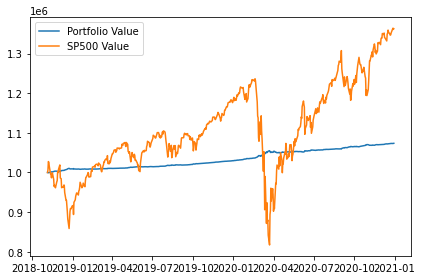

In [184]:
# Plot graph
graph(final_pf4)


----------------------------------------
# Back Test Key Results:
# Correlation: -0.9940720889080477
# CAPM Annualised Sharpe Ratio: 1.549
# Calmar Ratio: 6.306
# Max Drawdown ($): 5533.0
# Max Drawdown (%): -0.005244503898153452
# Max_dd_duration: 64.0
AxesSubplot(0.125,0.125;0.775x0.755)

----------------------------------------



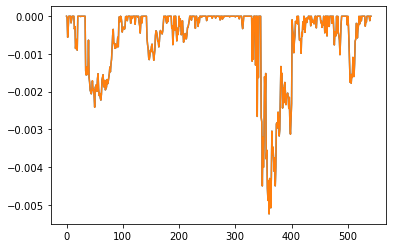

In [185]:
# Backtest Results
CR = round(calmarratio(final_pf4['Portfolio Returns'],final_pf4),3)
Max_dd_value = round(drawdown_value(final_pf4['Portfolio Value'])[0],0)
Max_dd_duration = drawdown_value(final_pf4['Portfolio Value'])[1]
CAPM_AnnualS = round(sharperatio(final_pf4['Portfolio Returns'])[1],3)
Max_dd_percentage = drawdowns(final_pf4['Portfolio Value'],final_pf4).min()
drawdowns(final_pf4['Portfolio Value'],final_pf4).plot()
Correlation = final_pf4['Portfolio Returns'].corr(final_pf4['SP500 Returns'])
Annualised_Returns = final_pf4

backtest_result = f"""
{'-'*40}
# Back Test Key Results:
# Correlation: {Correlation}
# CAPM Annualised Sharpe Ratio: {CAPM_AnnualS}
# Calmar Ratio: {CR}
# Max Drawdown ($): {Max_dd_value}
# Max Drawdown (%): {Max_dd_percentage}
# Max_dd_duration: {Max_dd_duration}
{drawdowns(final_pf4['Portfolio Value'],final_pf4).plot()}

{'-'*40}
"""

print(backtest_result)

The growth factors may not do well when the market is doing well but it is evident that the portfolio continues to grow despite market downturns.

# Summary

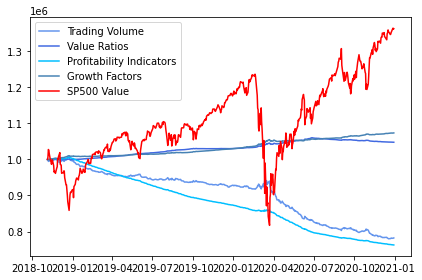

In [199]:
x = final_pf4['Date'].unique()
y1 = final_pf1['Portfolio Value'].values
y2 = final_pf2['Portfolio Value'].values
y3 = final_pf3['Portfolio Value'].values
y4 = final_pf4['Portfolio Value'].values
sp500 = final_pf4['SP500 Value'].values

plt.plot(x, y1, color='cornflowerblue', label = 'Trading Volume')
plt.plot(x, y2, color='royalblue', label = 'Value Ratios')
plt.plot(x, y3, color='deepskyblue',label = 'Profitability Indicators')
plt.plot(x, y4, color='steelblue', label = 'Growth Factors')
plt.plot(x, sp500, 'r',label = 'SP500 Value')

plt.tight_layout()
plt.legend()
plt.show()